# Dataset Visualizations

In [3]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sys
import collections
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir) ## add path to import helpers.py from parent dir
from helpers import Task, load_tasks_from_local

from utils import *
path_to_cache_dir: str = '../../cache'
path_to_tasks_xlsx: str = '../../data/Process Mining Task Demonstrations.xlsx'
drive = None
os.makedirs(path_to_cache_dir, exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
tasks: list[Task] = load_tasks_from_local('/Users/mwornow/Dropbox/Stanford/Re Lab/Workflows/demonstration-collection/data')

Loading df_valid.csv...: 0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/michaelwornow/Desktop/demonstration-collection/data/demos/463 @ 2024-02-05-17-15-18'

## Split tasks by website and difficulty

In [99]:
## split tasks by websites
website_task_splits: dict[str, list[Task]] = collections.defaultdict(list)
for task in tasks:
    website_task_splits[task.site].append(task)

print('Website demo splits:')
n_total = 0
for k, v in website_task_splits.items():
    print(f'{k}: {len(v)} demos')
    n_total += len(v)
assert n_total == len(tasks)

# ## split tasks by difficulty (per what the user said, which means the same task can be in multiple splits)
# difficulty_task_splits: dict[str, list[Task]] = collections.defaultdict(list)
# for task in tasks:
#     difficulty_task_splits[task.difficulty].append(task)

# ## sort keys by difficulty
# difficulty_task_splits = {
#     'Easy': difficulty_task_splits['Easy'],
#     'Medium': difficulty_task_splits['Medium'],
#     'Hard': difficulty_task_splits['Hard']
# }

# ## split tasks by difficulty (per what the AVERAGE user said, which means all demos for the same task are in the same split)
difficulty_task_splits: dict[str, list[Task]] = collections.defaultdict(list)
task_2_avg_difficulty: dict[str, int] = collections.defaultdict(int)
for task in tasks:
    task_2_avg_difficulty[task.task_id] += 1 if task.difficulty == 'Easy' else (2 if task.difficulty == 'Medium' else 3)
for task_id, avg_difficulty in task_2_avg_difficulty.items():
    task_2_avg_difficulty[task_id] = avg_difficulty / len([ t for t in tasks if t.task_id == task_id ])
for task in tasks:
    difficulty_task_splits[
        'Easy' if task_2_avg_difficulty[task.task_id] <= 1 
        else ('Medium' if task_2_avg_difficulty[task.task_id] <= 2 else 'Hard')].append(task)
print('Difficulty demo splits:')
n_total = 0
for k, v in difficulty_task_splits.items():
    print(f'{k}: {len(v)} demos')
    n_total += len(v)
assert n_total == len(tasks)

Website demo splits:
shopping_admin: 842 demos
gitlab: 850 demos
shopping: 752 demos
reddit: 483 demos
Difficulty demo splits:
Medium: 1775 demos
Hard: 365 demos
Easy: 787 demos


# Bar plot of website/difficulty splits

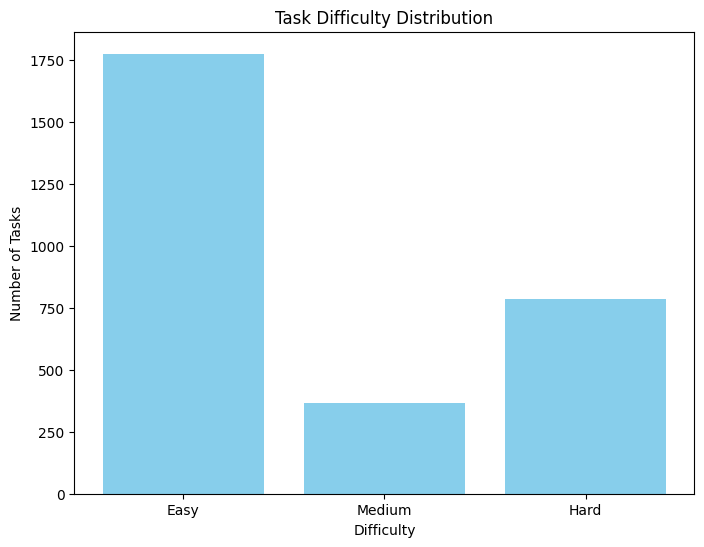

In [102]:
labels = ['Easy', 'Medium', 'Hard']
counts = list([ len(x) for x in difficulty_task_splits.values() ])

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue')

# Adding titles and labels
plt.title('Task Difficulty Distribution')
plt.xlabel('Difficulty')
plt.ylabel('Number of Tasks')

# Displaying the plot
plt.show()

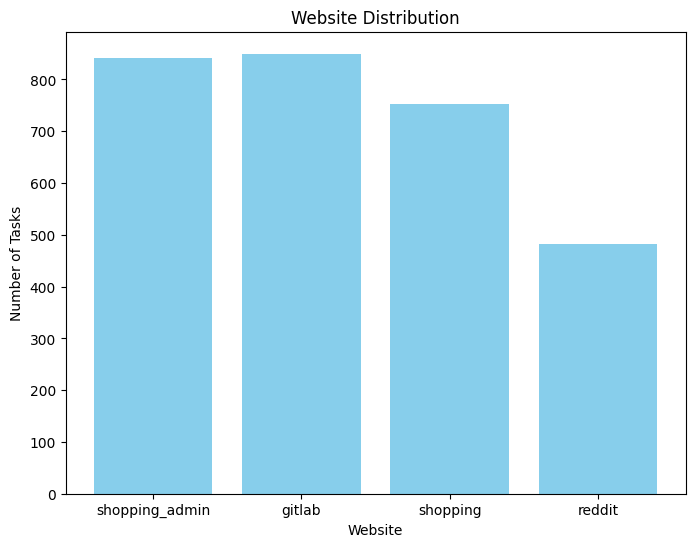

In [103]:
labels = list(website_task_splits.keys())
counts = list([ len(x) for x in website_task_splits.values() ])

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue')

# Adding titles and labels
plt.title('Website Distribution')
plt.xlabel('Website')
plt.ylabel('Number of Tasks')

# Displaying the plot
plt.show()

## Distribution of recording lengths

### Distribution over all recordings

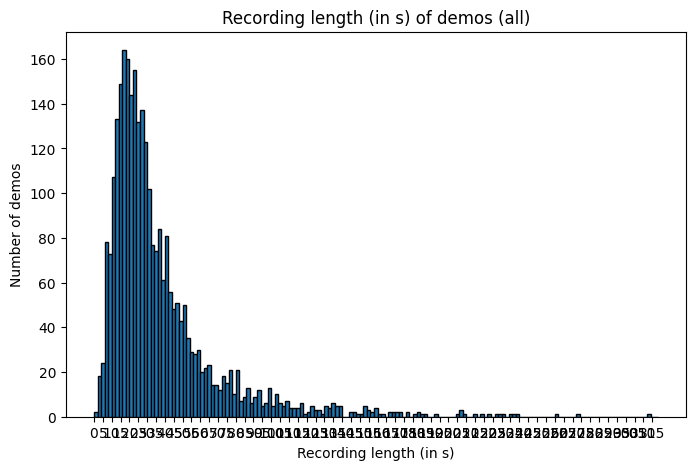

Stats for recording lenghts over all demos:
Number of samples in all: 2864
Min: 1.65, Max: 312.68
Mean: 37.22, Median: 27.37


In [104]:
recording_lengths: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in tasks ]
recording_lengths = [o for o in recording_lengths if o != -1] ## remove invalid recording lengths

plot_recording_len_hist('all', recording_lengths)
print('Stats for recording lenghts over all demos:')
print_stats('all', recording_lengths)

### Distribution over recordings split by website

#### Stats

In [105]:
recording_len_df = get_split_stats_df(website_task_splits, 'Website', lambda x: get_task_recording_length(drive, x, path_to_cache_dir))
print('Stats for recording lengths of demos split by website:')
print(recording_len_df.to_latex(index=False))

Stats for recording lengths of demos split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 1 & 29 & 260 \\
gitlab & 2 & 28 & 237 \\
shopping & 2 & 23 & 312 \\
reddit & 7 & 27 & 135 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

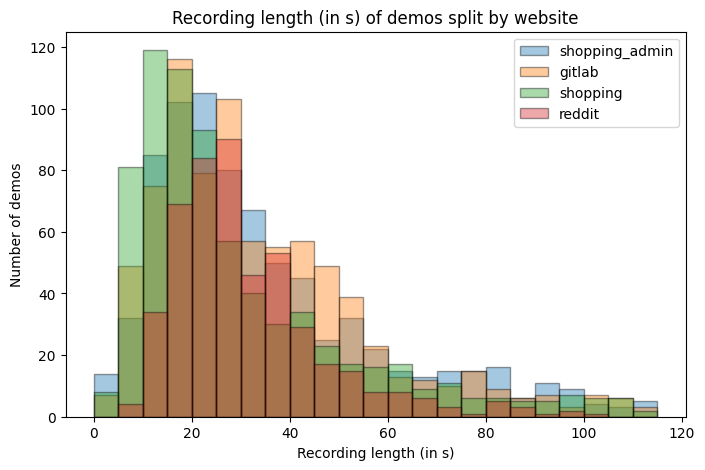

In [106]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in website_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), edgecolor='black', label=website, alpha=0.4)
    
plt.title(f'Recording length (in s) of demos split by website')
plt.xlabel('Recording length (in s)')
plt.ylabel('Number of demos')
plt.legend()
plt.show()

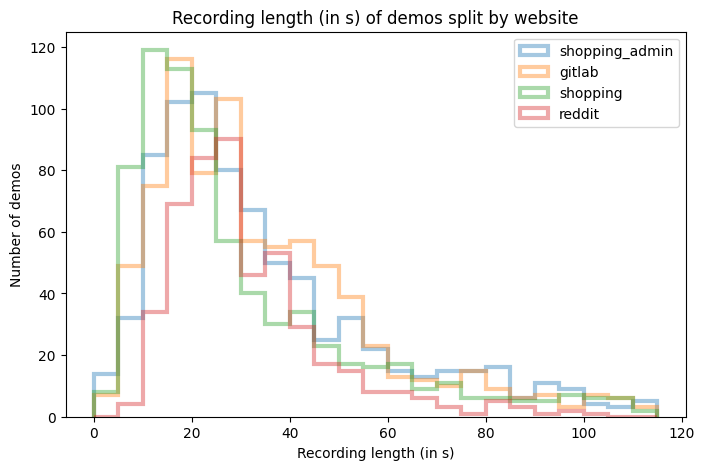

In [107]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in website_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), label=website, alpha=0.4, histtype='step', linewidth=3)
    
plt.title(f'Recording length (in s) of demos split by website')
plt.xlabel('Recording length (in s)')
plt.ylabel('Number of demos')
plt.legend()
plt.show()

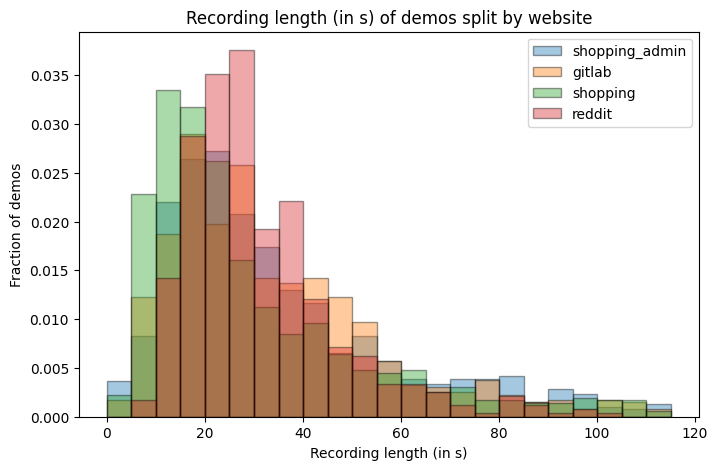

In [108]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in website_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), edgecolor='black', label=website, alpha=0.4, density=True)
    
plt.title(f'Recording length (in s) of demos split by website')
plt.xlabel('Recording length (in s)')
plt.ylabel('Fraction of demos')
plt.legend()
plt.show()

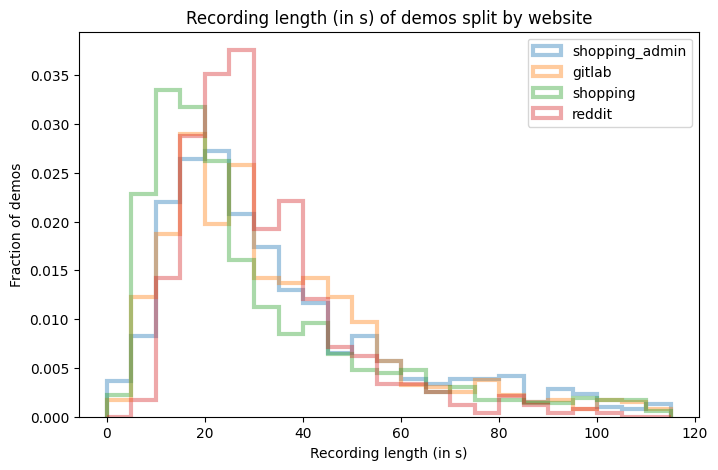

In [109]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in website_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), label=website, alpha=0.4, density=True, histtype='step', linewidth=3)
    
plt.title(f'Recording length (in s) of demos split by website')
plt.xlabel('Recording length (in s)')
plt.ylabel('Fraction of demos')
plt.legend()
plt.show()

#### Histogram by website

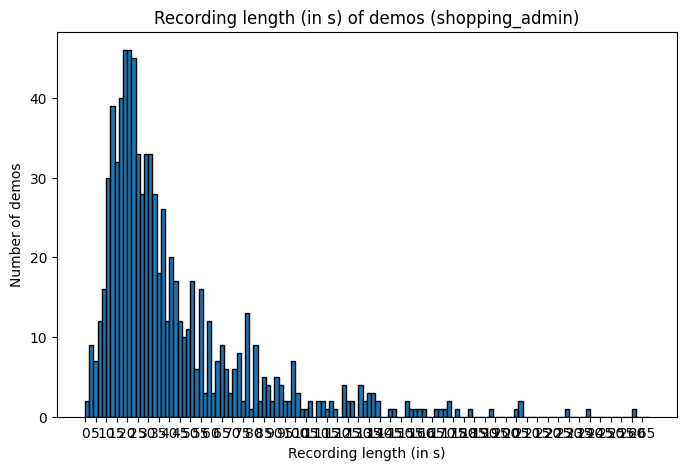

Stats for recording length (in s) of demos (shopping_admin):
Number of samples in shopping_admin: 818
Min: 1.65, Max: 260.78
Mean: 41.60, Median: 29.45


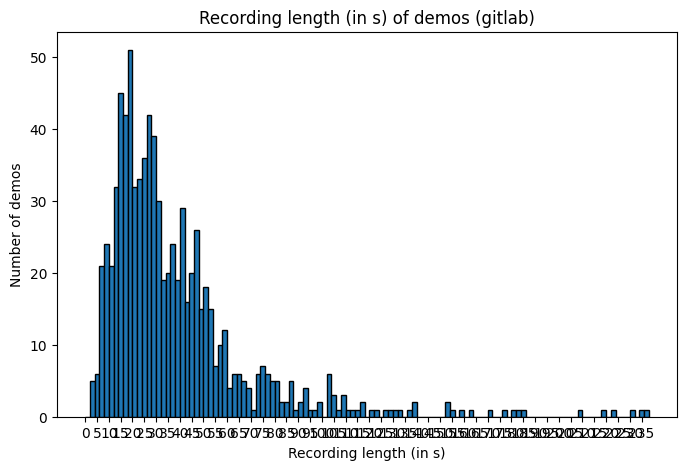

Stats for recording length (in s) of demos (gitlab):
Number of samples in gitlab: 827
Min: 2.03, Max: 237.95
Mean: 38.53, Median: 28.98


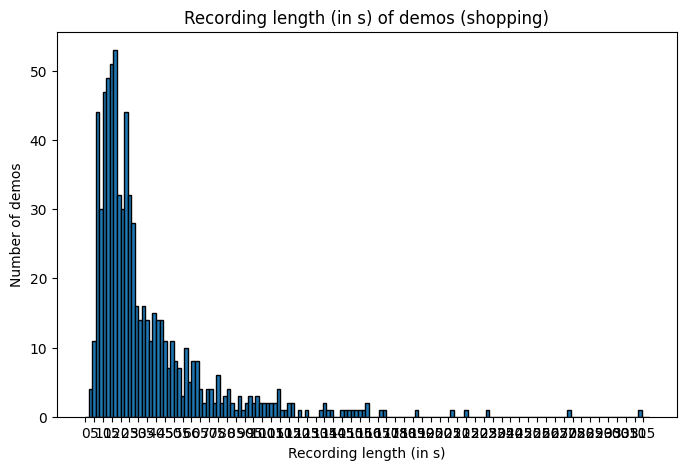

Stats for recording length (in s) of demos (shopping):
Number of samples in shopping: 739
Min: 2.12, Max: 312.68
Mean: 34.56, Median: 23.15


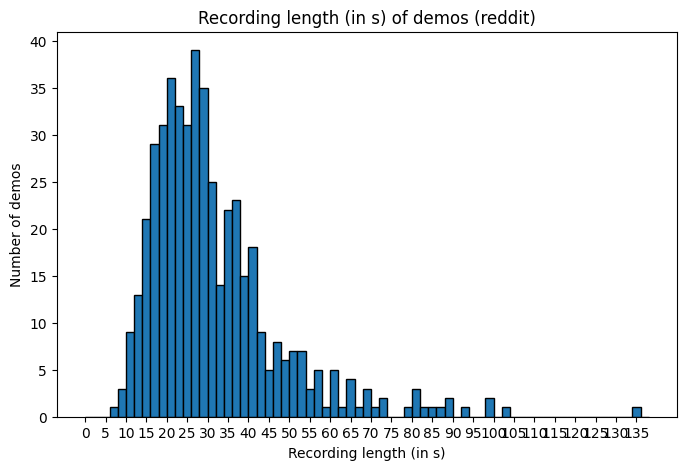

Stats for recording length (in s) of demos (reddit):
Number of samples in reddit: 480
Min: 7.73, Max: 135.13
Mean: 31.59, Median: 27.73


In [110]:
for website, website_tasks in website_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in website_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plot_recording_len_hist(website, recording_len)
    print(f'Stats for recording length (in s) of demos ({website}):')
    print_stats(website, recording_len)

### Distribution over recordings split by difficulty

#### Stats

In [111]:
recording_len_df = get_split_stats_df(difficulty_task_splits, 'Difficulty', lambda x: get_task_recording_length(drive, x, path_to_cache_dir))
print('Stats for recording lengths of demos split by difficulty:')
print(recording_len_df.to_latex(index=False))

Stats for recording lengths of demos split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Medium & 1 & 28 & 237 \\
Hard & 9 & 51 & 312 \\
Easy & 2 & 19 & 137 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

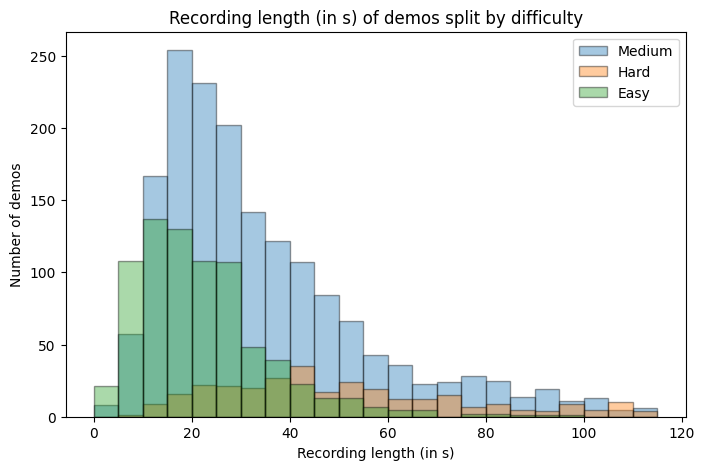

In [112]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in difficulty_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), edgecolor='black', label=difficulty, alpha=0.4)
    
plt.title(f'Recording length (in s) of demos split by difficulty')
plt.xlabel('Recording length (in s)')
plt.ylabel('Number of demos')
plt.legend()
plt.show()

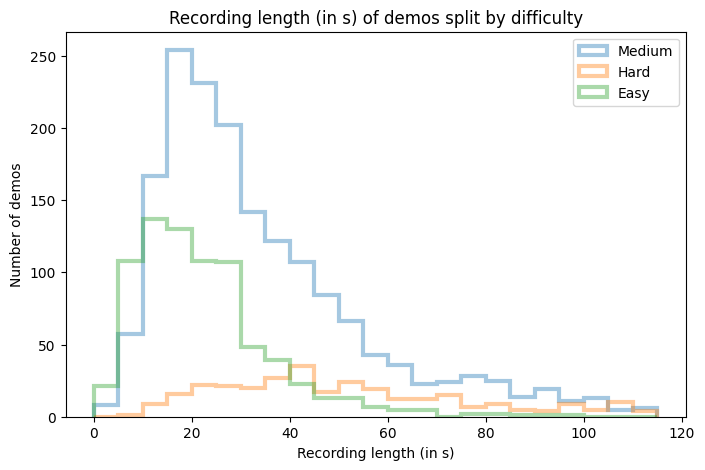

In [113]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in difficulty_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), label=difficulty, alpha=0.4, histtype='step', linewidth=3)
    
plt.title(f'Recording length (in s) of demos split by difficulty')
plt.xlabel('Recording length (in s)')
plt.ylabel('Number of demos')
plt.legend()
plt.show()

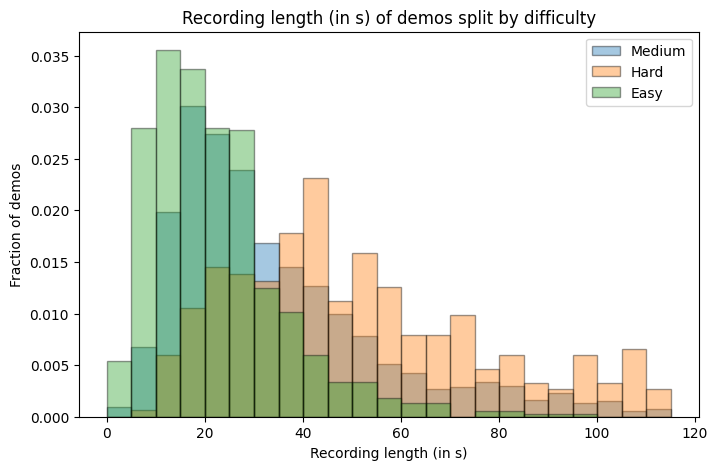

In [114]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in difficulty_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), edgecolor='black', label=difficulty, alpha=0.4, density=True)
    
plt.title(f'Recording length (in s) of demos split by difficulty')
plt.xlabel('Recording length (in s)')
plt.ylabel('Fraction of demos')
plt.legend()
plt.show()

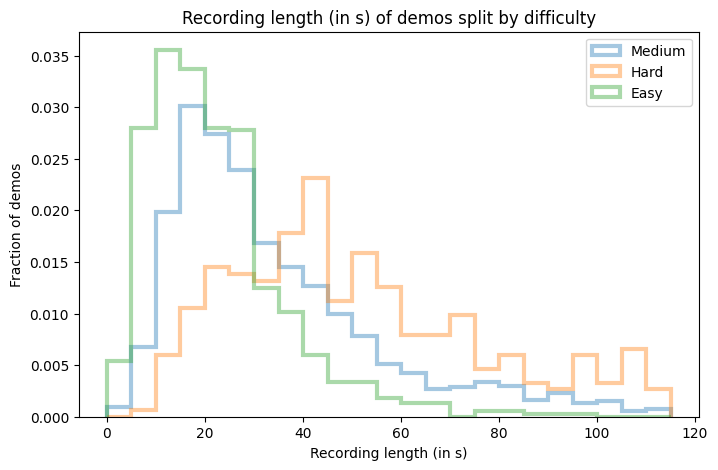

In [115]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in difficulty_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plt.hist(recording_len, bins=range(0, 120, 5), label=difficulty, alpha=0.4, density=True, histtype='step', linewidth=3)
    
plt.title(f'Recording length (in s) of demos split by difficulty')
plt.xlabel('Recording length (in s)')
plt.ylabel('Fraction of demos')
plt.legend()
plt.show()

#### Histogram by difficulty

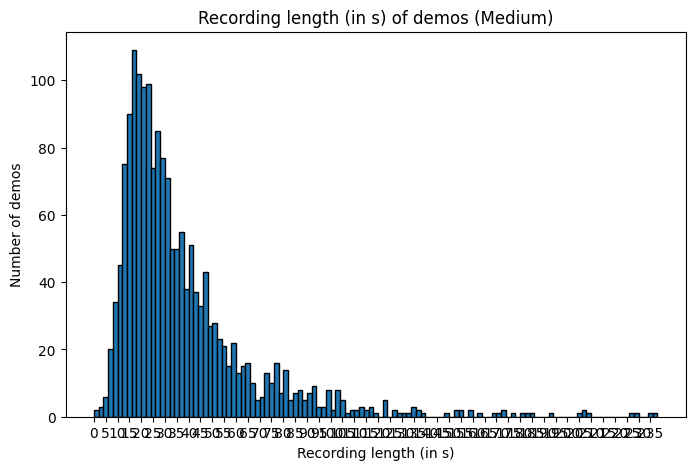

Stats for recording length (in s) of demos (Medium):
Number of samples in Medium: 1733
Min: 1.65, Max: 237.95
Mean: 37.51, Median: 28.55


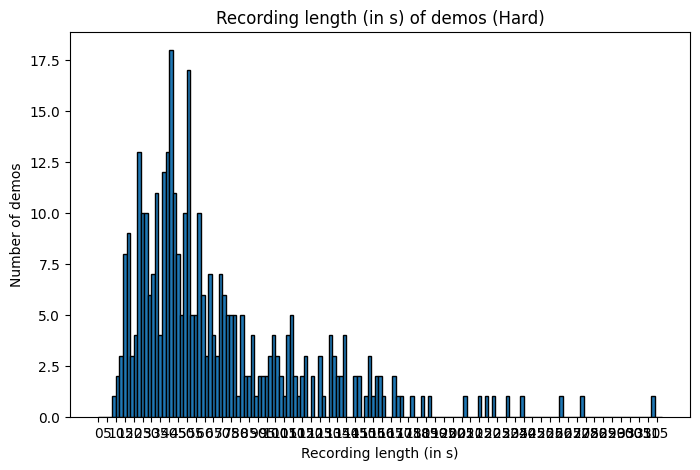

Stats for recording length (in s) of demos (Hard):
Number of samples in Hard: 358
Min: 9.48, Max: 312.68
Mean: 67.61, Median: 51.42


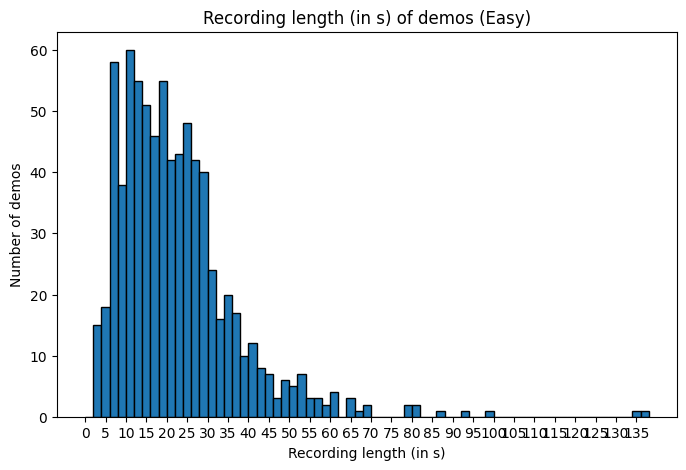

Stats for recording length (in s) of demos (Easy):
Number of samples in Easy: 773
Min: 2.03, Max: 137.42000000000002
Mean: 22.50, Median: 19.63


In [116]:
for difficulty, difficulty_tasks in difficulty_task_splits.items():
    recording_len: list[float] = [get_task_recording_length(drive, task, path_to_cache_dir) for task in difficulty_tasks]
    recording_len = [o for o in recording_len if o != -1] ## Remove invalid recordings

    plot_recording_len_hist(difficulty, recording_len)
    print(f'Stats for recording length (in s) of demos ({difficulty}):')
    print_stats(difficulty, recording_len)

## Distribution of \# of steps in SOP

### Distribution over all SOPs

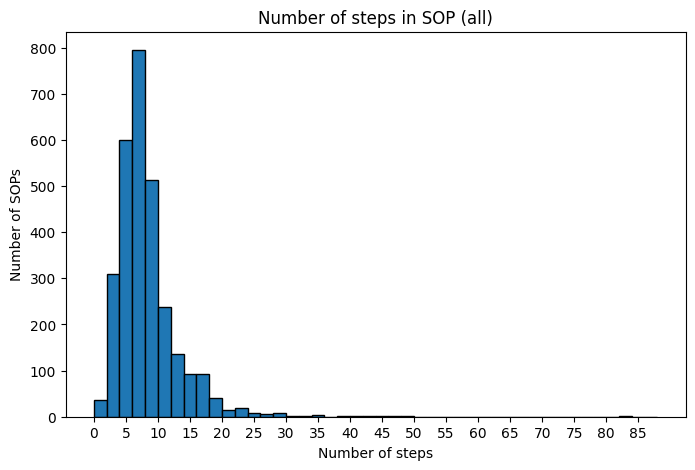

Stats for number of steps in all SOPs:
Number of samples in all: 2927
Min: 1, Max: 82
Mean: 7.76, Median: 7


In [117]:
num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in tasks]
num_steps = [o for o in num_steps if o is not None] ## Remove None values

plot_sop_steps_hist('all', num_steps)
print('Stats for number of steps in all SOPs:')
print_stats('all', num_steps)

### Distribution over SOPs split by website

#### Stats

In [118]:
num_steps_df = get_split_stats_df(website_task_splits, 'Website', lambda x: get_num_steps_in_sop(drive, x))
print('Stats for number of steps in SOPs split by website:')
print(num_steps_df.to_latex(index=False))

Stats for number of steps in SOPs split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 2 & 8 & 47 \\
gitlab & 1 & 7 & 48 \\
shopping & 1 & 5 & 82 \\
reddit & 2 & 6 & 18 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

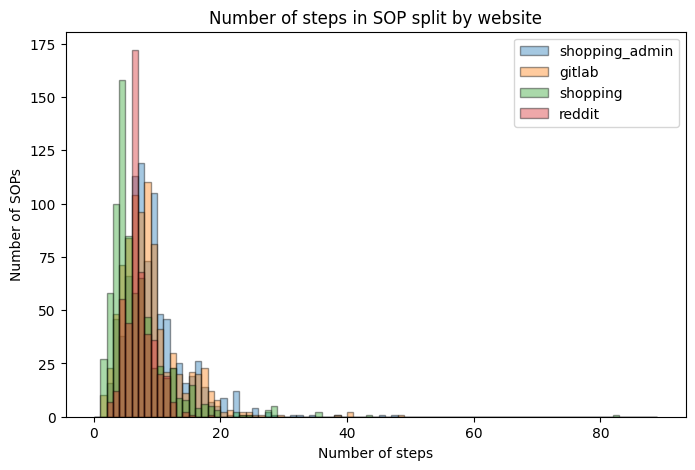

In [119]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in website_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), edgecolor='black', label=website, alpha=0.4)
    
plt.title(f'Number of steps in SOP split by website')
plt.xlabel('Number of steps')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

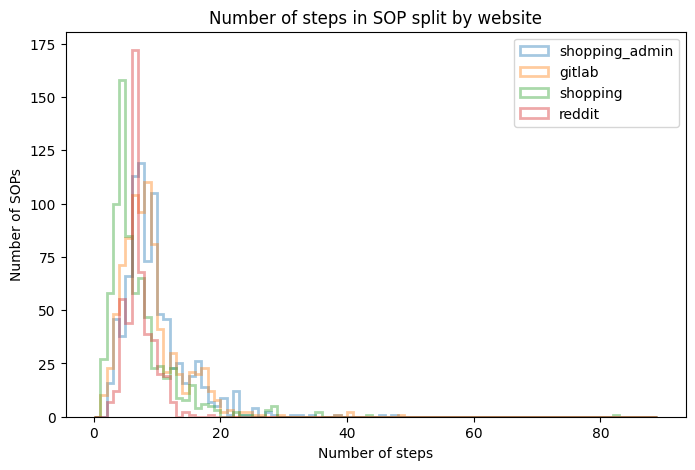

In [120]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in website_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), label=website, alpha=0.4, histtype='step', linewidth=2)
    
plt.title(f'Number of steps in SOP split by website')
plt.xlabel('Number of steps')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

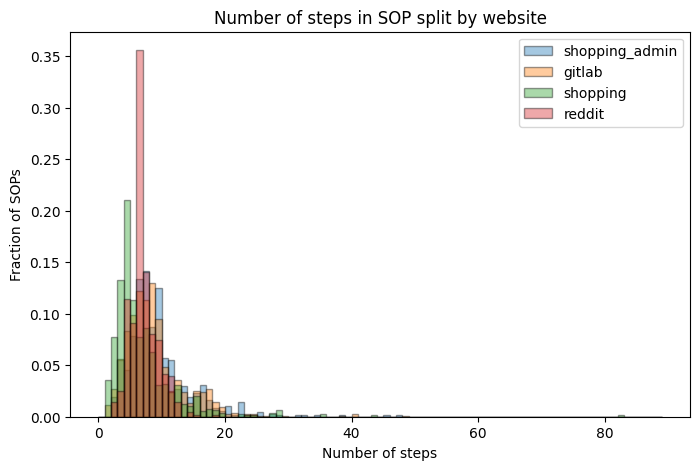

In [121]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in website_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), edgecolor='black', label=website, alpha=0.4, density=True)
    
plt.title(f'Number of steps in SOP split by website')
plt.xlabel('Number of steps')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

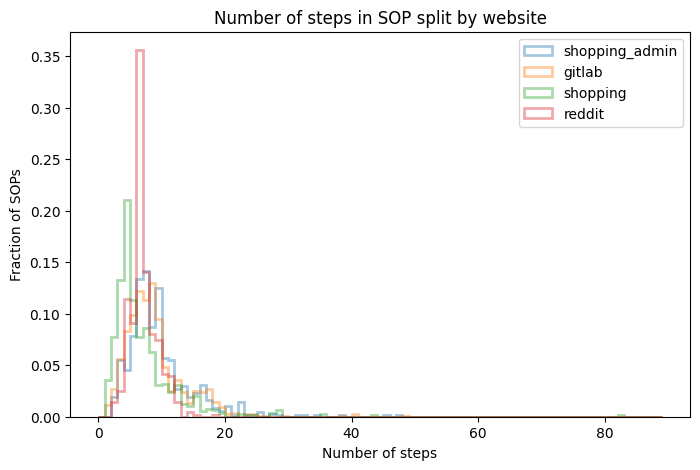

In [122]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in website_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), label=website, alpha=0.4, histtype='step', linewidth=2, density=True)
    
plt.title(f'Number of steps in SOP split by website')
plt.xlabel('Number of steps')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

#### Histogram per website

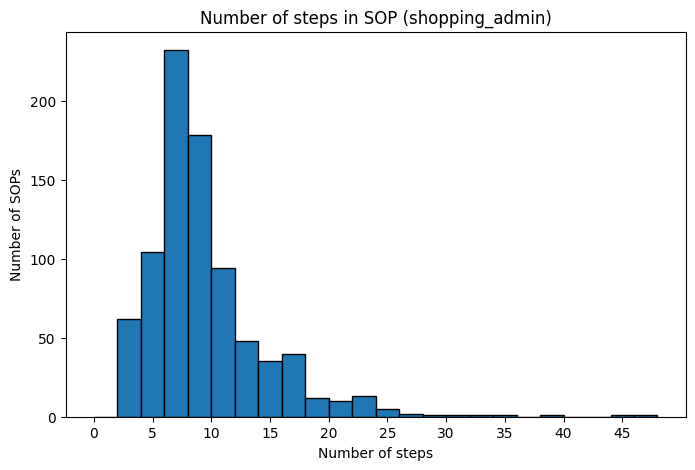

Stats for number of steps in SOPs (shopping_admin):
Number of samples in shopping_admin: 842
Min: 2, Max: 47
Mean: 9.01, Median: 8


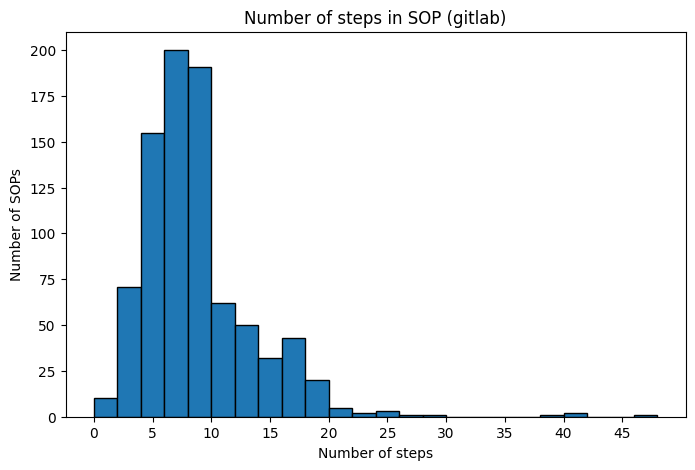

Stats for number of steps in SOPs (gitlab):
Number of samples in gitlab: 850
Min: 1, Max: 48
Mean: 8.31, Median: 7


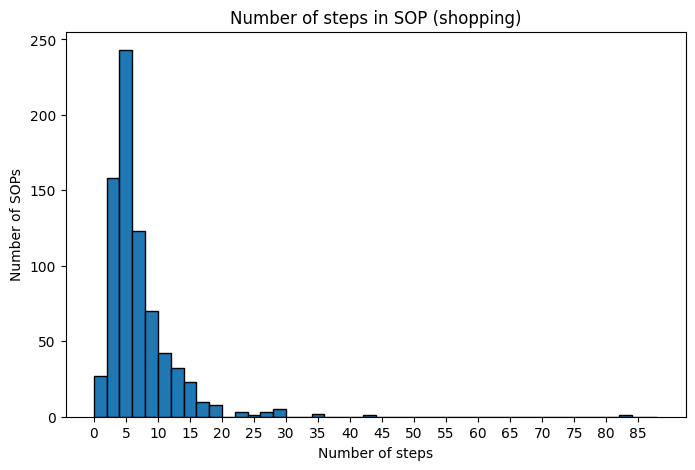

Stats for number of steps in SOPs (shopping):
Number of samples in shopping: 752
Min: 1, Max: 82
Mean: 6.48, Median: 5


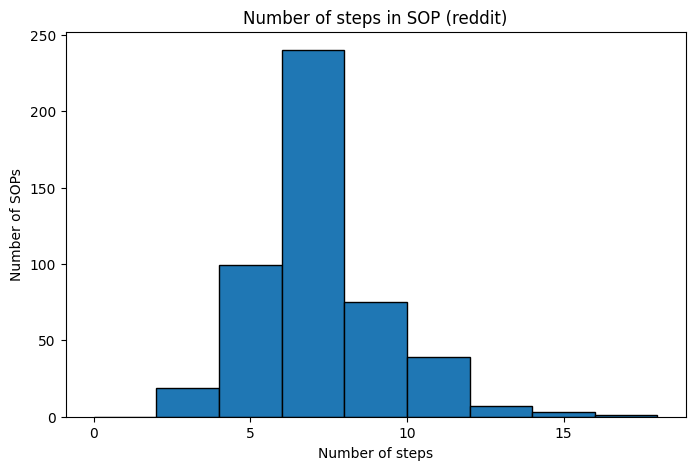

Stats for number of steps in SOPs (reddit):
Number of samples in reddit: 483
Min: 2, Max: 18
Mean: 6.60, Median: 6


In [123]:
for website, website_tasks in website_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in website_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plot_sop_steps_hist(website, num_steps)
    print(f'Stats for number of steps in SOPs ({website}):')
    print_stats(website, num_steps)

### Distribution over SOPs split by difficulty

#### Stats

In [124]:
num_steps_df = get_split_stats_df(difficulty_task_splits, 'Difficulty', lambda x: get_num_steps_in_sop(drive, x))
print('Stats for number of steps in SOPs split by difficulty:')
print(num_steps_df.to_latex(index=False))

Stats for number of steps in SOPs split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Medium & 1 & 7 & 82 \\
Hard & 2 & 10 & 48 \\
Easy & 1 & 5 & 14 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

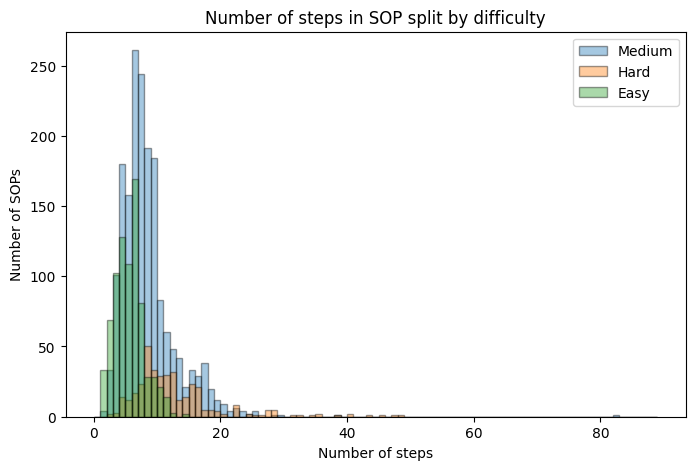

In [125]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in difficulty_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), edgecolor='black', label=difficulty, alpha=0.4)

plt.title(f'Number of steps in SOP split by difficulty')
plt.xlabel('Number of steps')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

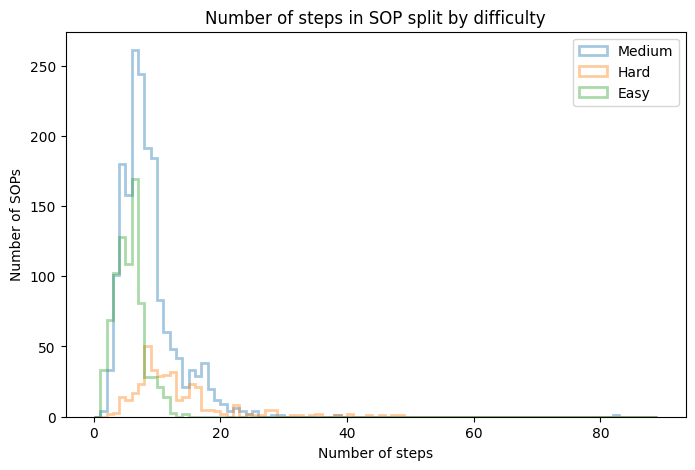

In [126]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in difficulty_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), label=difficulty, alpha=0.4, histtype='step', linewidth=2)

plt.title(f'Number of steps in SOP split by difficulty')
plt.xlabel('Number of steps')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

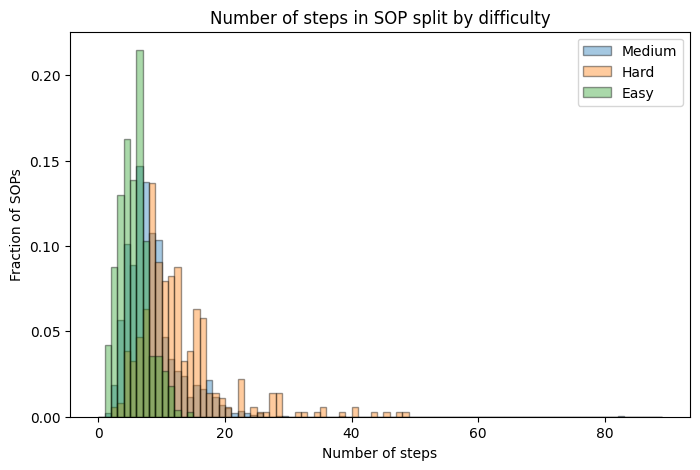

In [127]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in difficulty_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), edgecolor='black', label=difficulty, alpha=0.4, density=True)

plt.title(f'Number of steps in SOP split by difficulty')
plt.xlabel('Number of steps')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

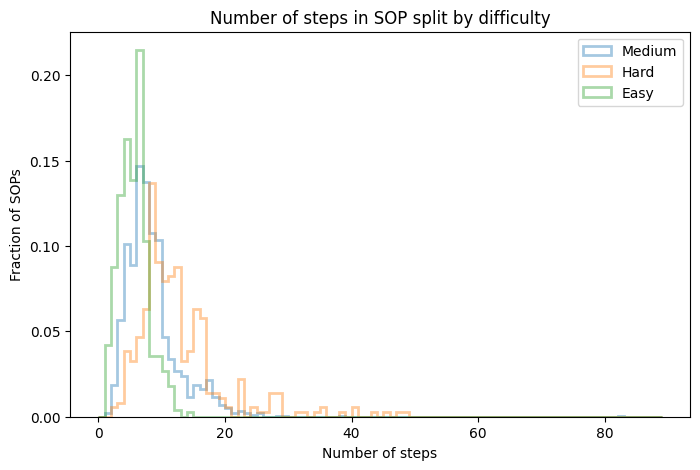

In [128]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in difficulty_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plt.hist(num_steps, bins=range(90), label=difficulty, alpha=0.4, density=True, histtype='step', linewidth=2)

plt.title(f'Number of steps in SOP split by difficulty')
plt.xlabel('Number of steps')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

#### Histogram per difficulty

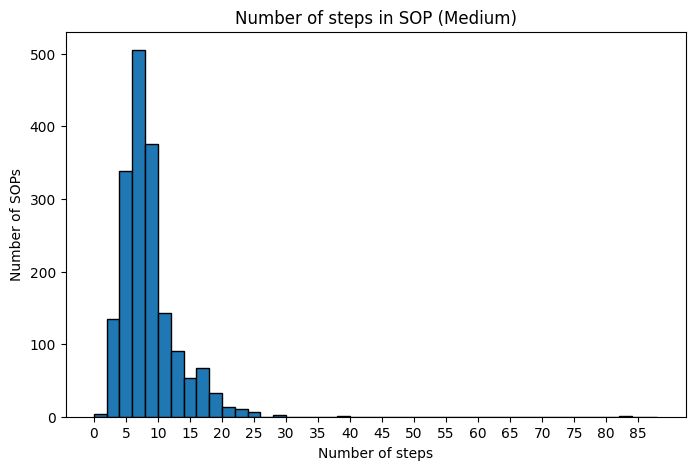

Stats for number of steps in SOPs (Medium):
Number of samples in Medium: 1775
Min: 1, Max: 82
Mean: 8.03, Median: 7


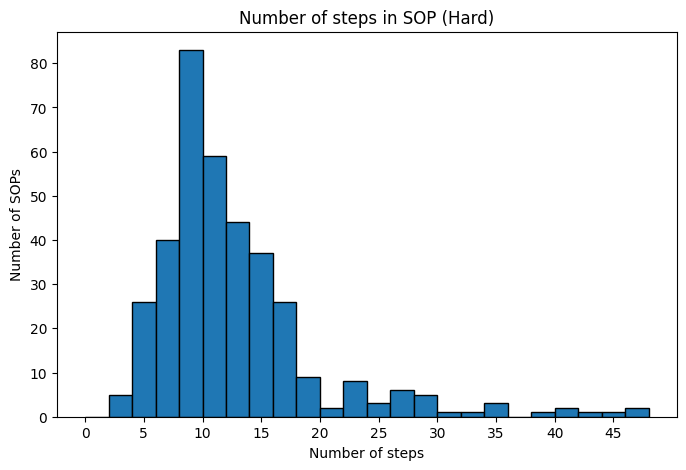

Stats for number of steps in SOPs (Hard):
Number of samples in Hard: 365
Min: 2, Max: 48
Mean: 12.15, Median: 10


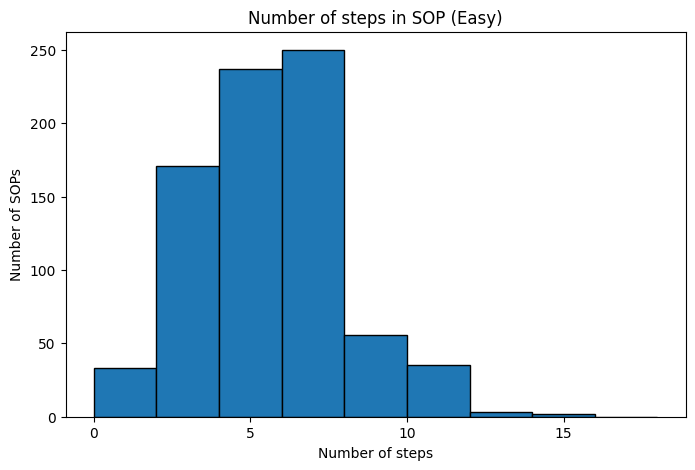

Stats for number of steps in SOPs (Easy):
Number of samples in Easy: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


In [129]:
for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_steps: list[int] = [get_num_steps_in_sop(drive, task) for task in difficulty_tasks]
    num_steps = [o for o in num_steps if o is not None] ## Remove None values

    plot_sop_steps_hist(difficulty, num_steps)
    print(f'Stats for number of steps in SOPs ({difficulty}):')
    print_stats(difficulty, num_steps)

## Distribution of \# of tokens in SOP

### Distribution over all SOPs

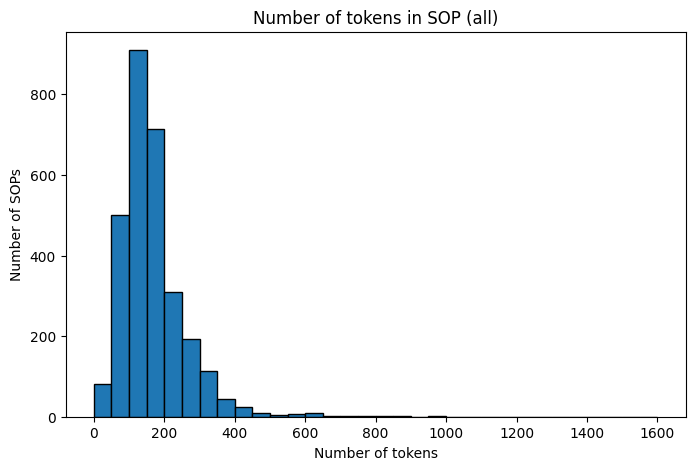

Stats for number of steps in all SOPs:
Number of samples in all: 2927
Min: 12, Max: 1631
Mean: 166.52, Median: 148


In [130]:
num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in tasks]
num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

plot_sop_tokens_hist('all', num_tokens)
print('Stats for number of steps in all SOPs:')
print_stats('all', num_tokens)

### Distribution over SOPs split by website

#### Stats

In [131]:
num_tokens_df = get_split_stats_df(website_task_splits, 'Website', lambda x: get_num_tokens_sop(drive, x))
print('Stats for number of tokens in SOPs split by website:')
print(num_tokens_df.to_latex(index=False))

Stats for number of tokens in SOPs split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 30 & 163 & 704 \\
gitlab & 12 & 151 & 870 \\
shopping & 18 & 121 & 1631 \\
reddit & 43 & 148 & 382 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

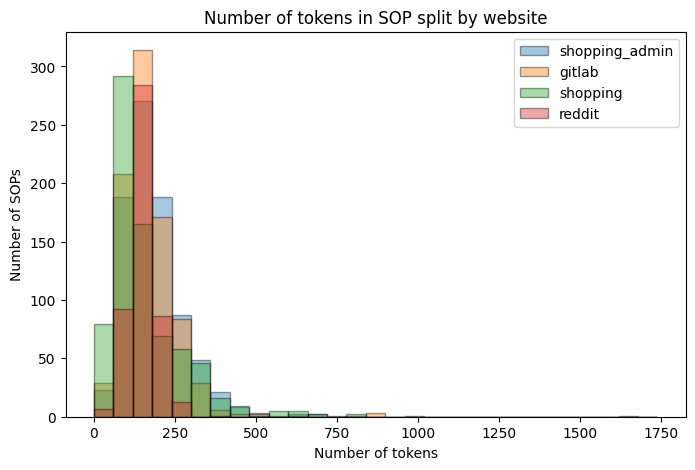

In [132]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in website_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), edgecolor='black', label=website, alpha=0.4)
    
plt.title(f'Number of tokens in SOP split by website')
plt.xlabel('Number of tokens')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

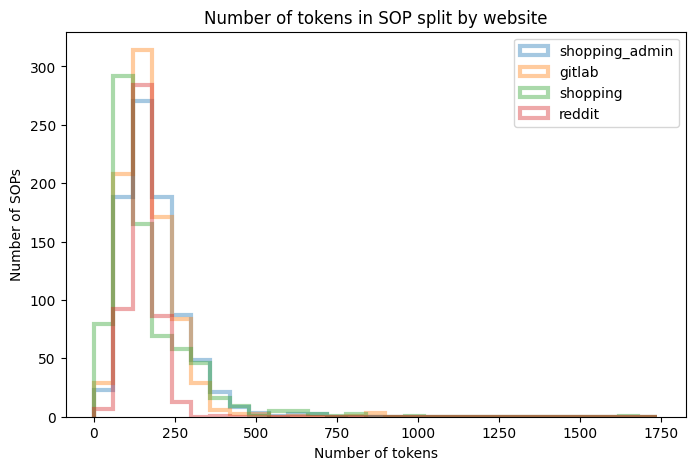

In [133]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in website_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), label=website, alpha=0.4, linewidth=3, histtype='step')
    
plt.title(f'Number of tokens in SOP split by website')
plt.xlabel('Number of tokens')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

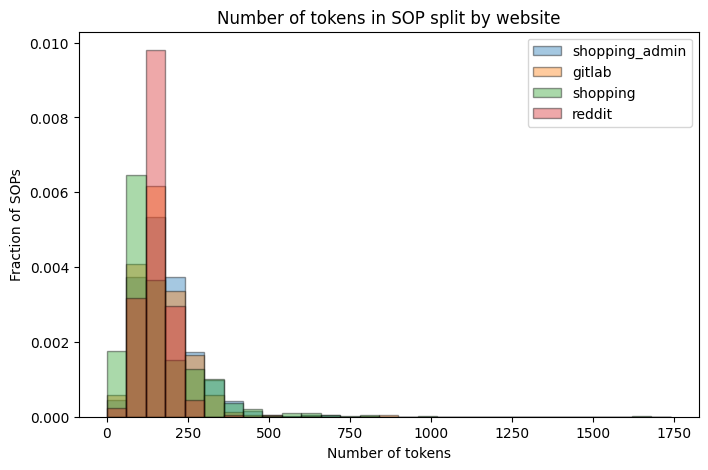

In [134]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in website_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), edgecolor='black', label=website, alpha=0.4, density=True)
    
plt.title(f'Number of tokens in SOP split by website')
plt.xlabel('Number of tokens')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

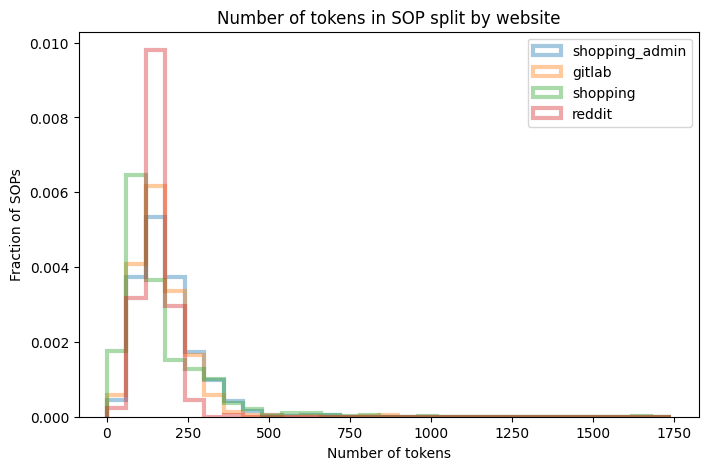

In [135]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in website_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), label=website, alpha=0.4, density=True, histtype='step', linewidth=3)
    
plt.title(f'Number of tokens in SOP split by website')
plt.xlabel('Number of tokens')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

#### Histogram per website

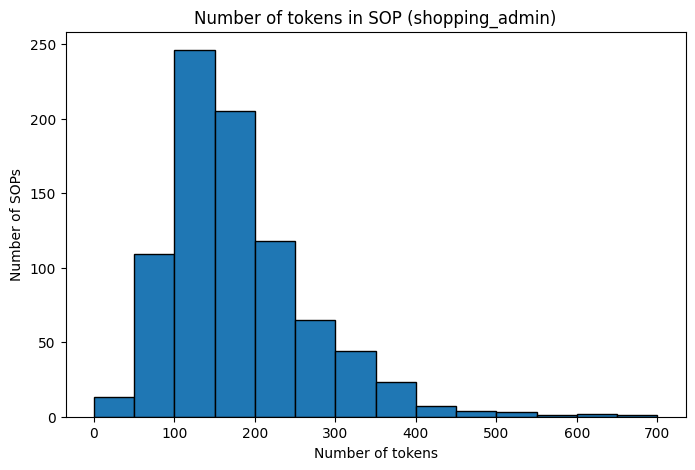

Stats for number of tokens in SOPs (shopping_admin):
Number of samples in shopping_admin: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


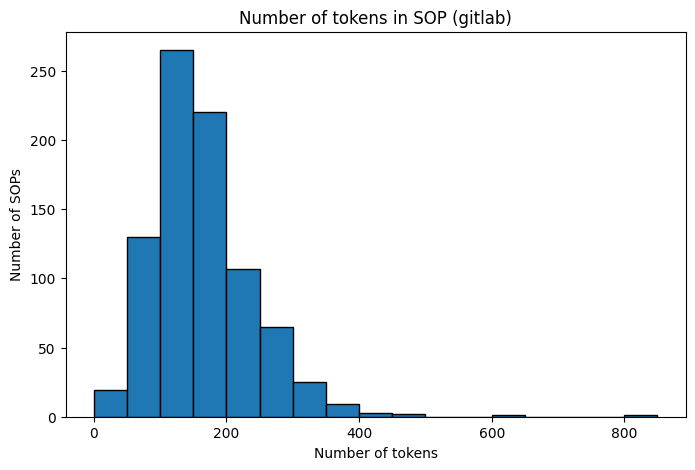

Stats for number of tokens in SOPs (gitlab):
Number of samples in gitlab: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


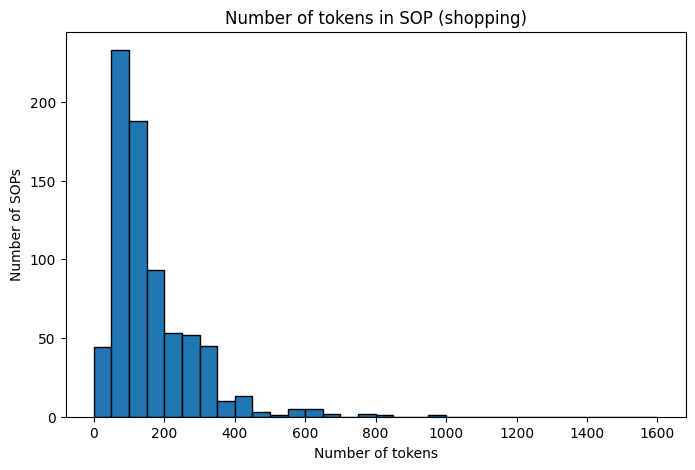

Stats for number of tokens in SOPs (shopping):
Number of samples in shopping: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


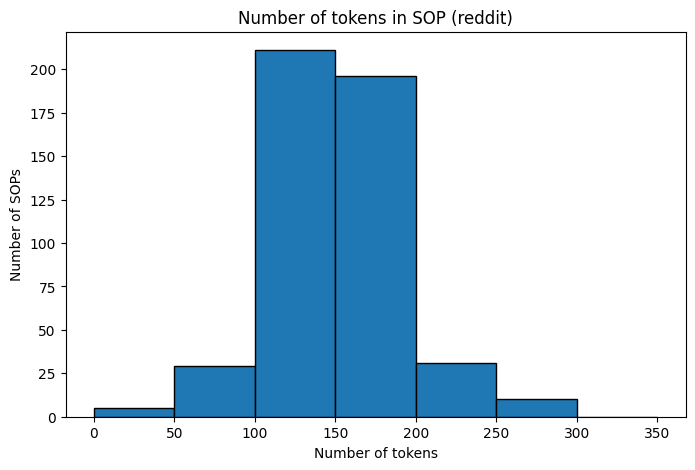

Stats for number of tokens in SOPs (reddit):
Number of samples in reddit: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


In [136]:
for website, website_tasks in website_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in website_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plot_sop_tokens_hist(website, num_tokens)
    print(f'Stats for number of tokens in SOPs ({website}):')
    print_stats(website, num_steps)

### Distribution over SOPs split by difficulty

#### Stats

In [137]:
num_tokens_df = get_split_stats_df(difficulty_task_splits, 'Difficulty', lambda x: get_num_tokens_sop(drive, x))
print('Stats for number of tokens in SOPs split by difficulty:')
print(num_tokens_df.to_latex(index=False))

Stats for number of tokens in SOPs split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Medium & 12 & 154 & 1631 \\
Hard & 62 & 240 & 976 \\
Easy & 18 & 114 & 382 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

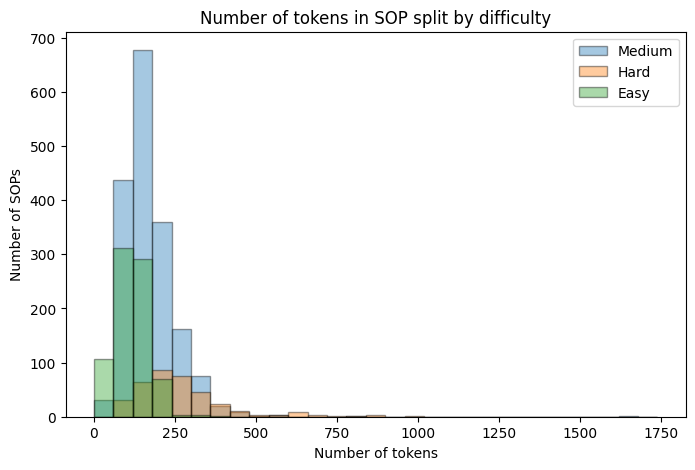

In [138]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in difficulty_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), edgecolor='black', label=difficulty, alpha=0.4)
    
plt.title(f'Number of tokens in SOP split by difficulty')
plt.xlabel('Number of tokens')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

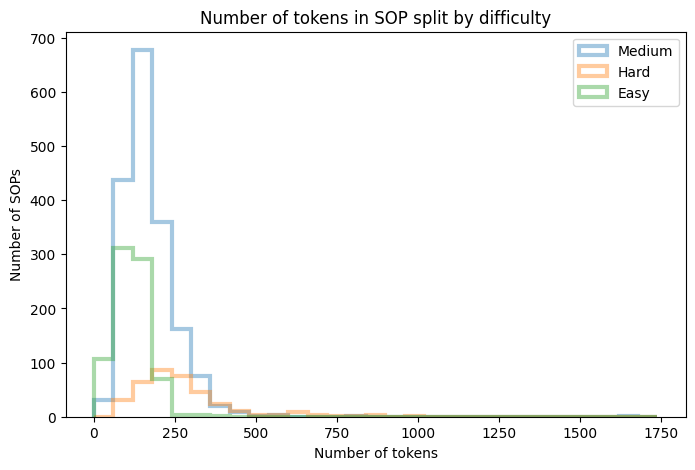

In [139]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in difficulty_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), label=difficulty, alpha=0.4, histtype='step', linewidth=3)
    
plt.title(f'Number of tokens in SOP split by difficulty')
plt.xlabel('Number of tokens')
plt.ylabel('Number of SOPs')
plt.legend()
plt.show()

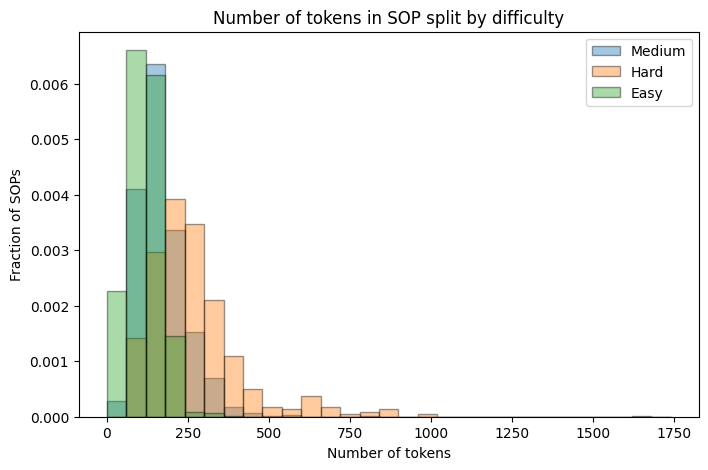

In [140]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in difficulty_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), edgecolor='black', label=difficulty, alpha=0.4, density=True)
    
plt.title(f'Number of tokens in SOP split by difficulty')
plt.xlabel('Number of tokens')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

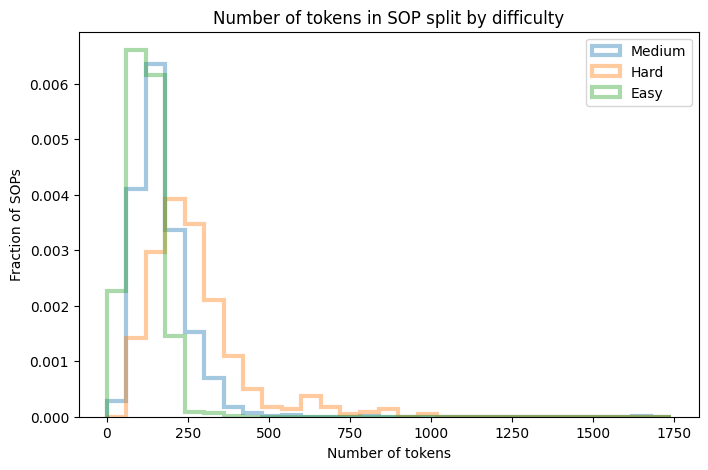

In [141]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in difficulty_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plt.hist(num_tokens, bins=range(0, 1800, 60), label=difficulty, alpha=0.4, density=True, histtype='step', linewidth=3)
    
plt.title(f'Number of tokens in SOP split by difficulty')
plt.xlabel('Number of tokens')
plt.ylabel('Fraction of SOPs')
plt.legend()
plt.show()

#### Histogram per difficulty

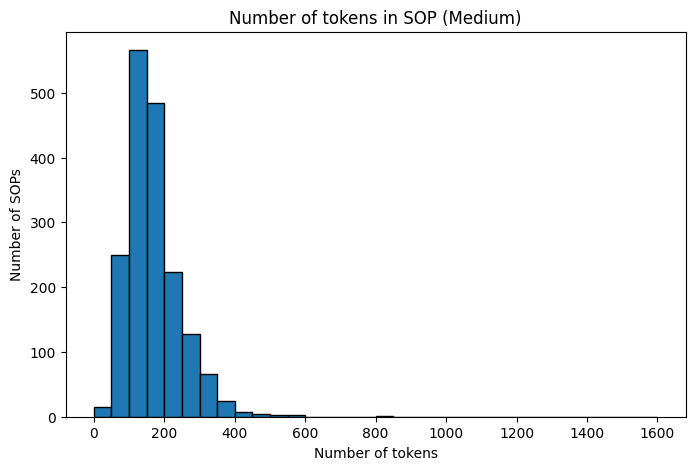

Stats for number of tokens in SOPs (Medium):
Number of samples in Medium: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


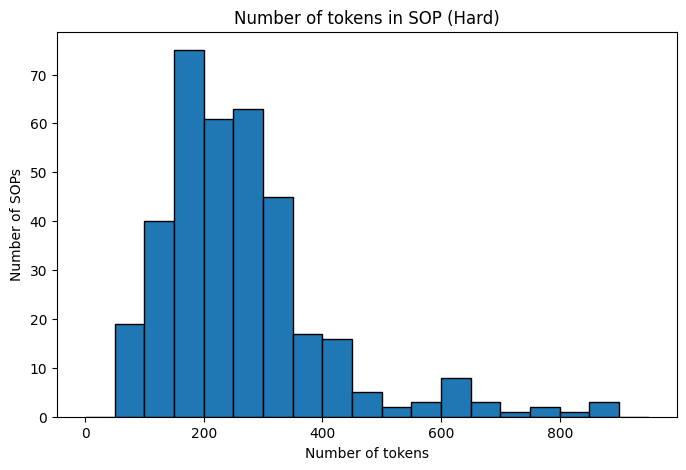

Stats for number of tokens in SOPs (Hard):
Number of samples in Hard: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


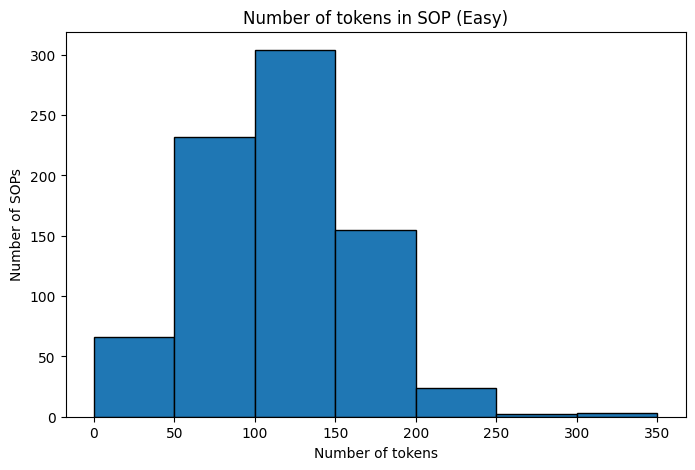

Stats for number of tokens in SOPs (Easy):
Number of samples in Easy: 787
Min: 1, Max: 14
Mean: 5.11, Median: 5


In [142]:
for difficulty, difficulty_tasks in difficulty_task_splits.items():
    num_tokens: list[int] = [get_num_tokens_sop(drive, task) for task in difficulty_tasks]
    num_tokens = [o for o in num_tokens if o is not None] ## Remove None values

    plot_sop_tokens_hist(difficulty, num_tokens)
    print(f'Stats for number of tokens in SOPs ({difficulty}):')
    print_stats(difficulty, num_steps)

## Distribution of \# of actions in action traces

### Distribution over all action traces

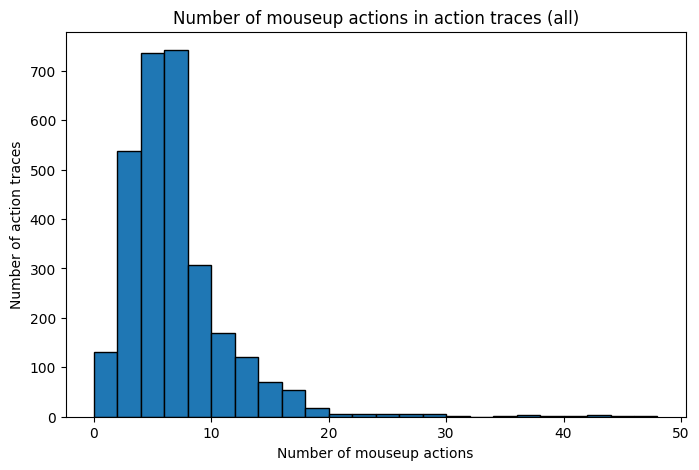

Stats for number of mouseup in all SOPs:
Number of samples in all: 2927
Min: 0, Max: 47
Mean: 6.45, Median: 6


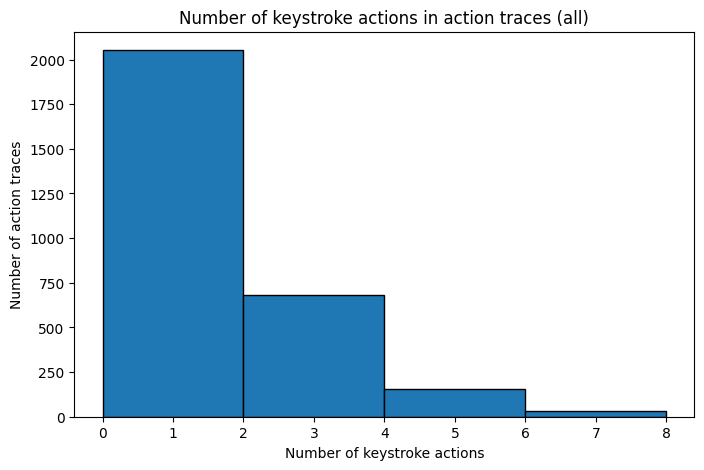

Stats for number of keystroke in all SOPs:
Number of samples in all: 2927
Min: 0, Max: 8
Mean: 1.21, Median: 1


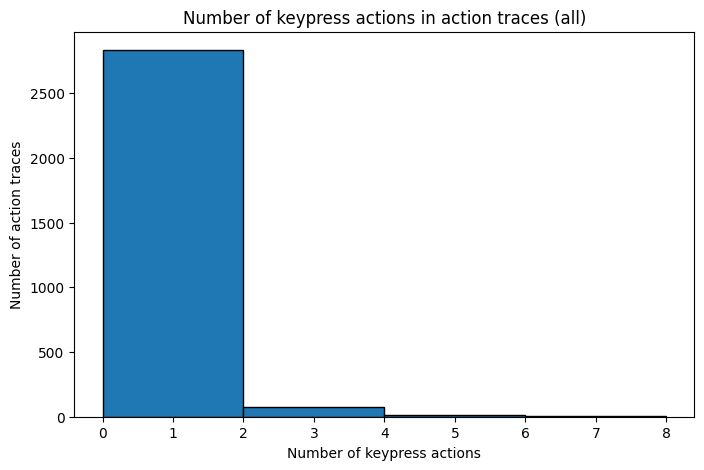

Stats for number of keypress in all SOPs:
Number of samples in all: 2927
Min: 0, Max: 7
Mean: 0.32, Median: 0


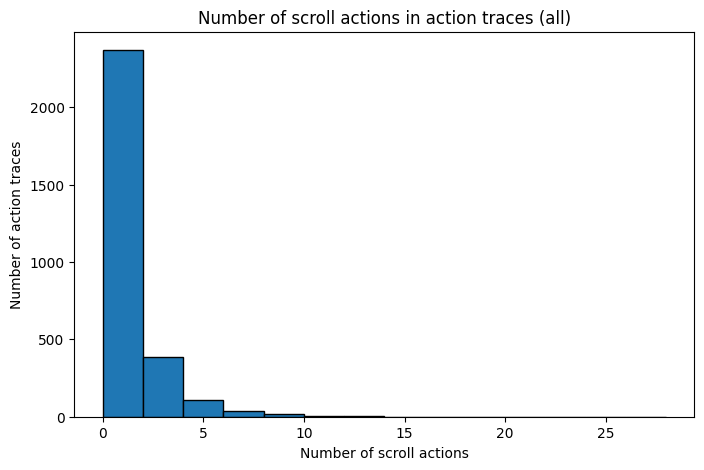

Stats for number of scroll in all SOPs:
Number of samples in all: 2927
Min: 0, Max: 28
Mean: 0.92, Median: 0


In [143]:
action_counts: dict[str, list[int]] = get_action_acounts(drive, tasks)
for action, counts in action_counts.items():
    plot_action_counts_hist('all', action, counts)
    print(f'Stats for number of {action} in all SOPs:')
    print_stats('all', counts)

### Distribution over action traces split by website

#### Stats

In [144]:
for action in action_char2action.values():

    num_actions_df = get_split_stats_df(website_task_splits, 'Website', lambda x: get_task_action_counts(drive, x)[action])
    print(f'Stats for number of {action} actions split by website:')
    print(num_actions_df.to_latex(index=False))

Stats for number of mouseup actions split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 0 & 6 & 29 \\
gitlab & 0 & 6 & 44 \\
shopping & 1 & 4 & 47 \\
reddit & 2 & 6 & 23 \\
\bottomrule
\end{tabular}

Stats for number of keystroke actions split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 0 & 1 & 8 \\
gitlab & 0 & 1 & 7 \\
shopping & 0 & 0 & 7 \\
reddit & 0 & 1 & 8 \\
\bottomrule
\end{tabular}

Stats for number of keypress actions split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 0 & 0 & 6 \\
gitlab & 0 & 0 & 7 \\
shopping & 0 & 0 & 3 \\
reddit & 0 & 0 & 1 \\
\bottomrule
\end{tabular}

Stats for number of scroll actions split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 0 & 1 & 13 \\
gitlab & 0 & 0 & 9 \\
shopping & 0 & 1 & 28 \\
reddit & 0 & 0 & 5 \\
\bottomrule
\en

#### Overlaid histogram

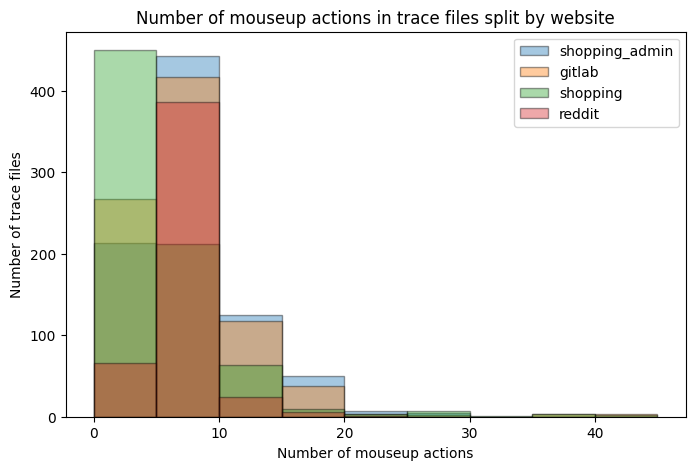

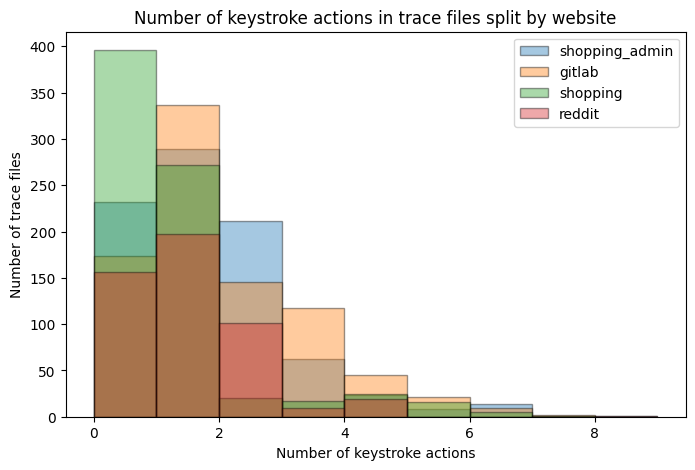

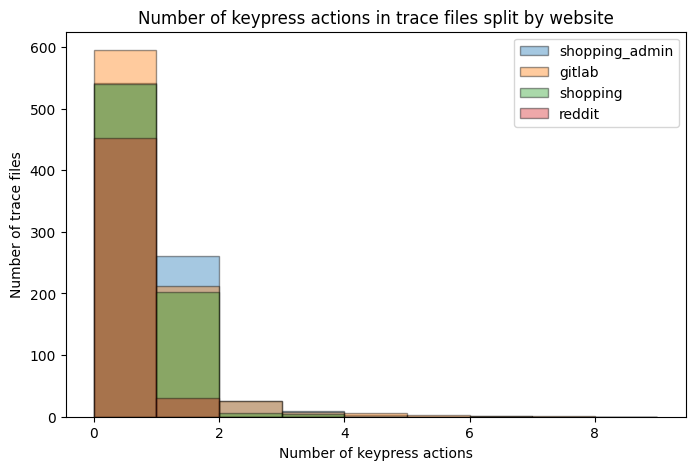

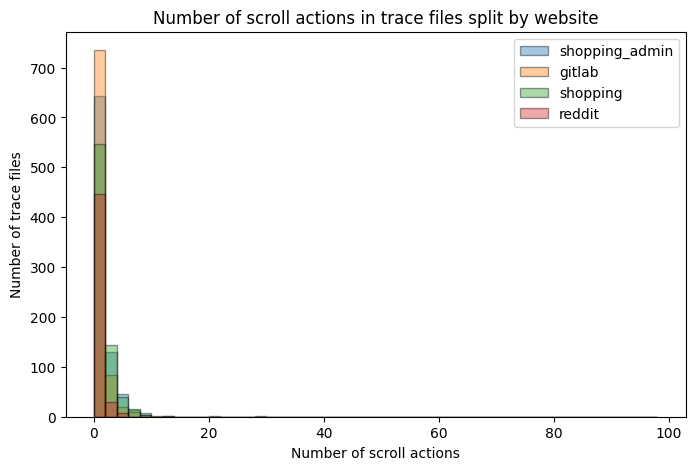

In [145]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}


for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for website, website_tasks in website_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in website_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], edgecolor='black', label=website, alpha=0.4)
        
    plt.title(f'Number of {action} actions in trace files split by website')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Number of trace files')
    plt.legend()
    plt.show()
    

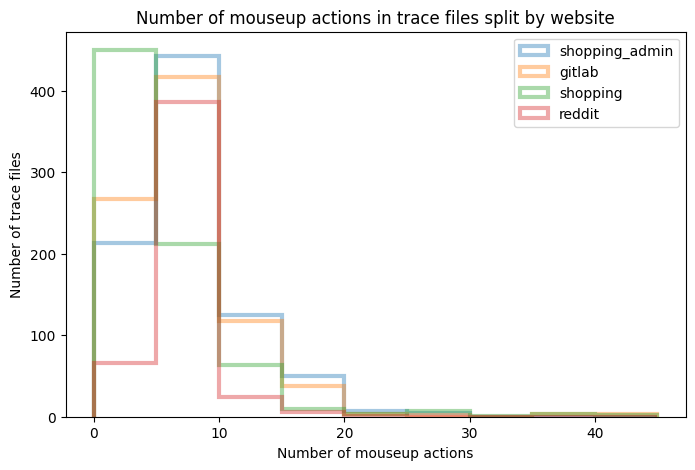

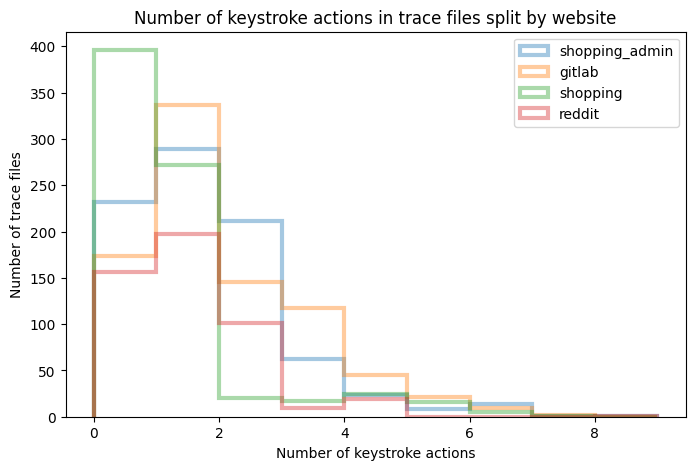

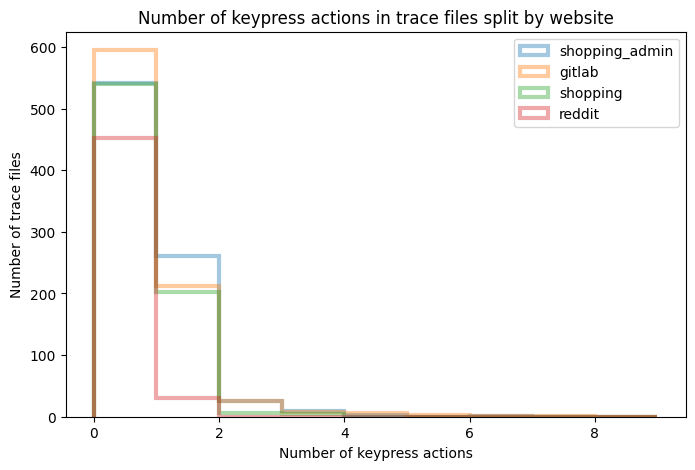

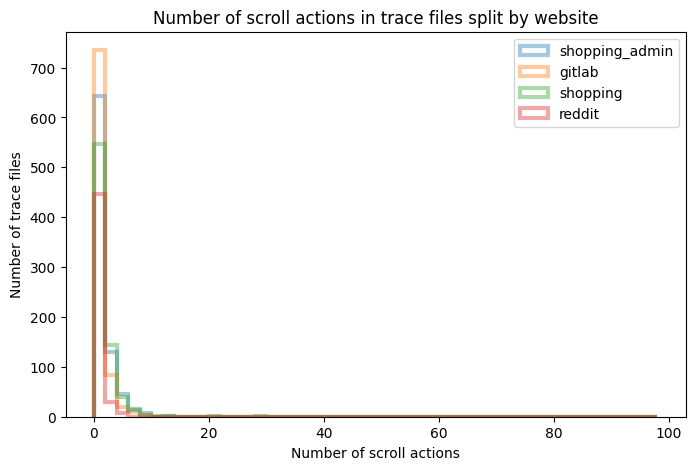

In [146]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}


for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for website, website_tasks in website_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in website_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], label=website, alpha=0.4, histtype='step', linewidth=3)
        
    plt.title(f'Number of {action} actions in trace files split by website')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Number of trace files')
    plt.legend()
    plt.show()
    

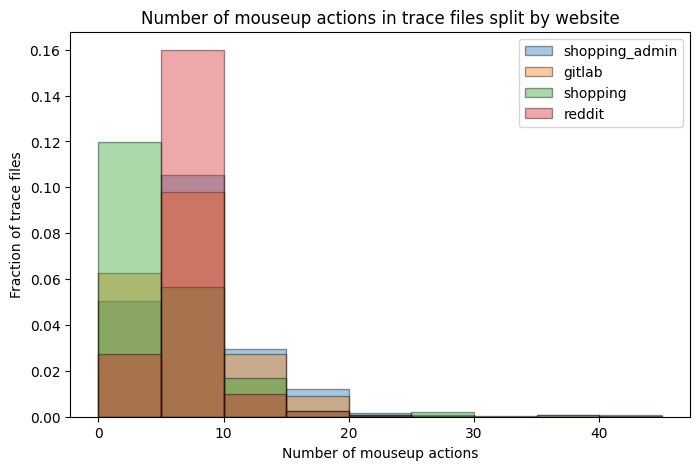

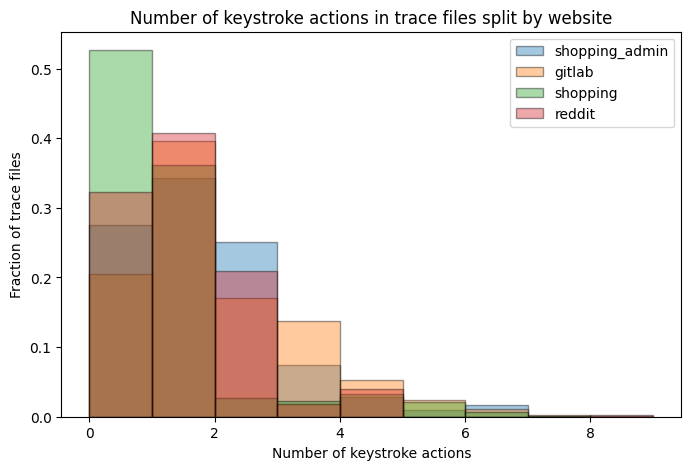

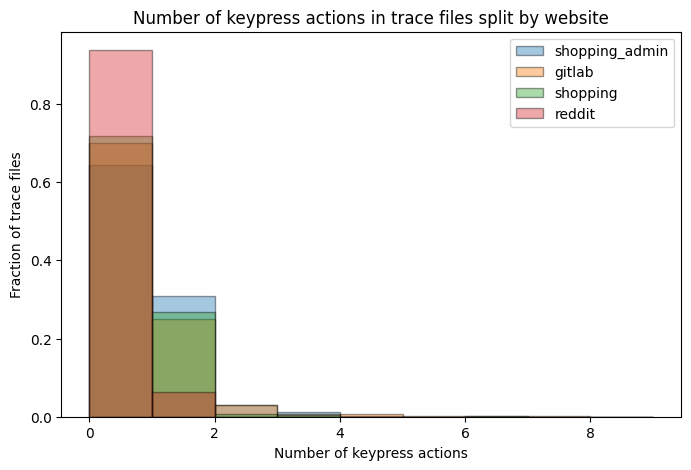

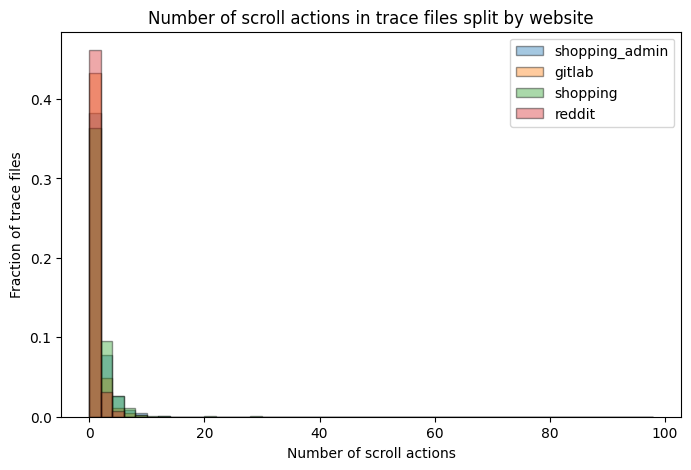

In [147]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}


for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for website, website_tasks in website_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in website_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], edgecolor='black', label=website, alpha=0.4, density=True)
        
    plt.title(f'Number of {action} actions in trace files split by website')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Fraction of trace files')
    plt.legend()
    plt.show()
    

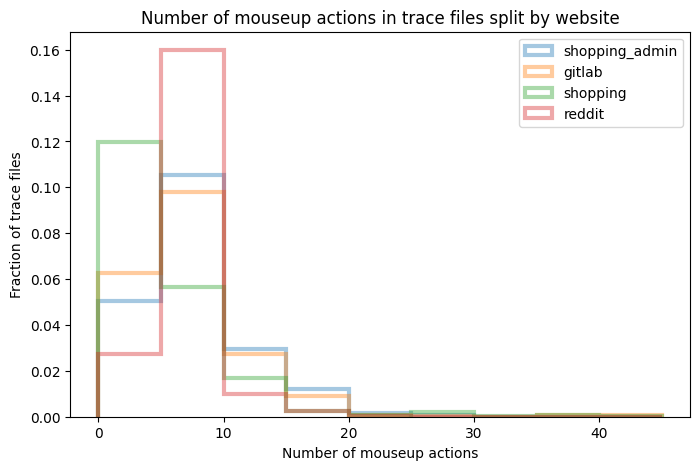

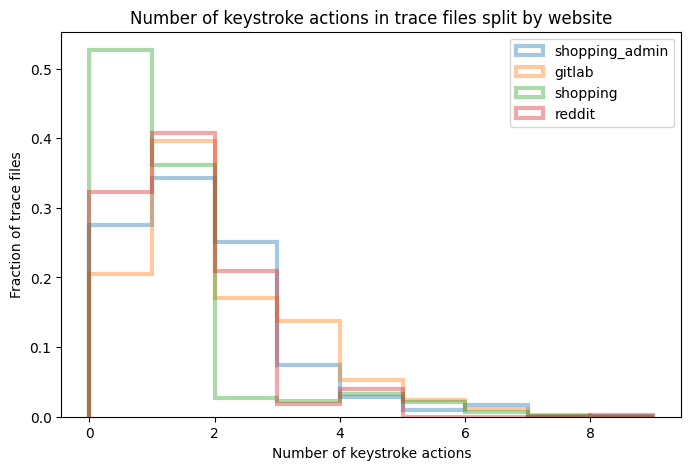

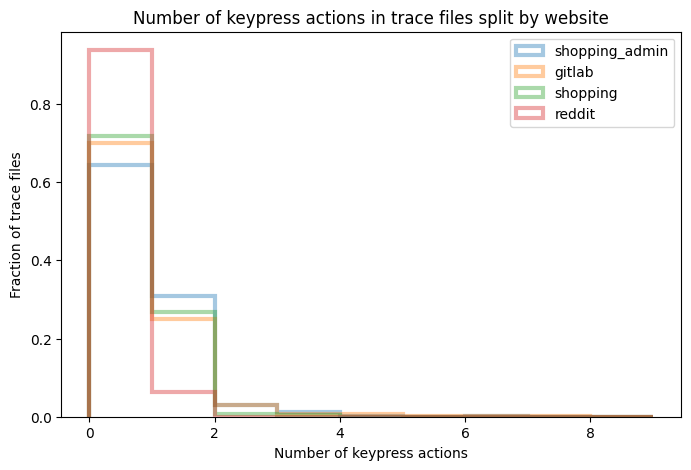

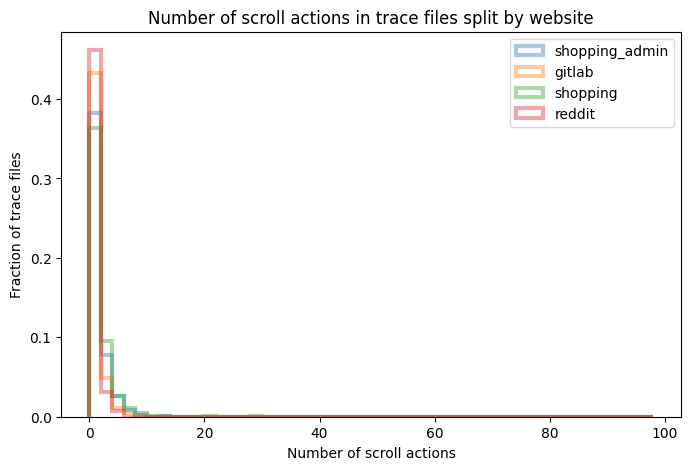

In [148]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}


for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for website, website_tasks in website_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in website_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], label=website, alpha=0.4, density=True, histtype='step', linewidth=3)
        
    plt.title(f'Number of {action} actions in trace files split by website')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Fraction of trace files')
    plt.legend()
    plt.show()
    

#### Histogram per website

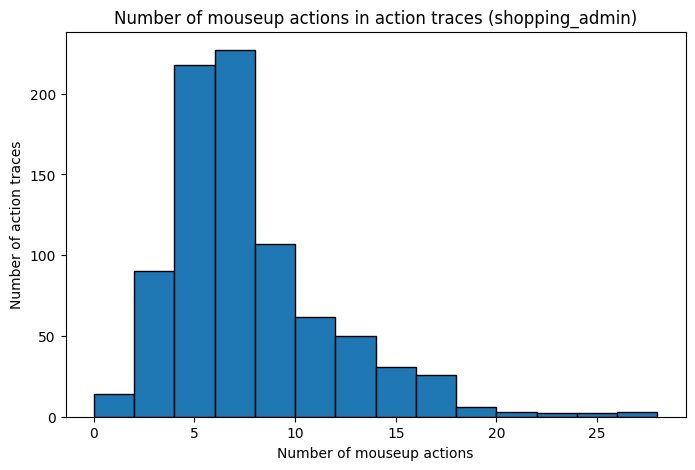

Stats for number of mouseup in shopping_admin SOPs:
Number of samples in shopping_admin: 842
Min: 0, Max: 29
Mean: 7.27, Median: 6


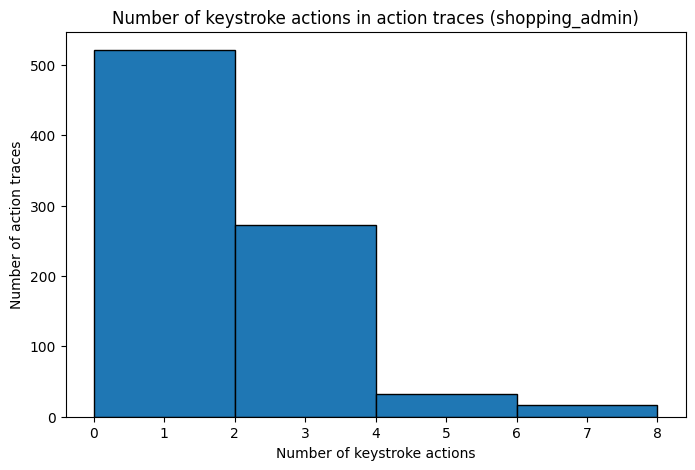

Stats for number of keystroke in shopping_admin SOPs:
Number of samples in shopping_admin: 842
Min: 0, Max: 8
Mean: 1.34, Median: 1


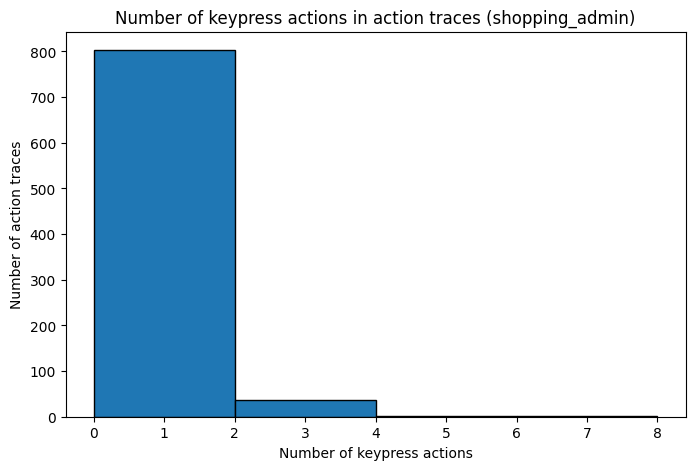

Stats for number of keypress in shopping_admin SOPs:
Number of samples in shopping_admin: 842
Min: 0, Max: 6
Mean: 0.42, Median: 0


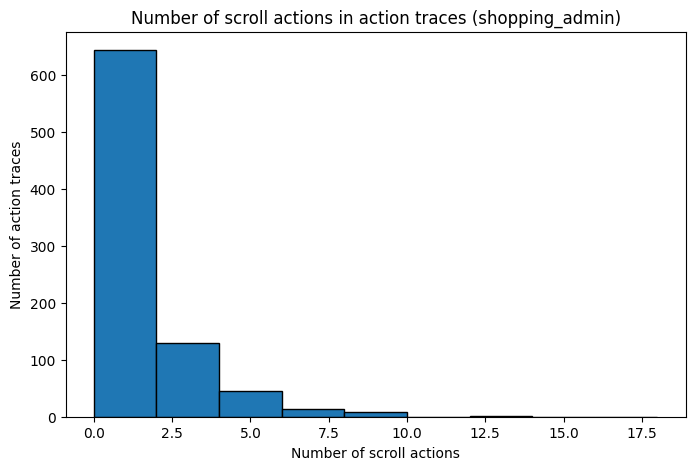

Stats for number of scroll in shopping_admin SOPs:
Number of samples in shopping_admin: 842
Min: 0, Max: 13
Mean: 1.11, Median: 1


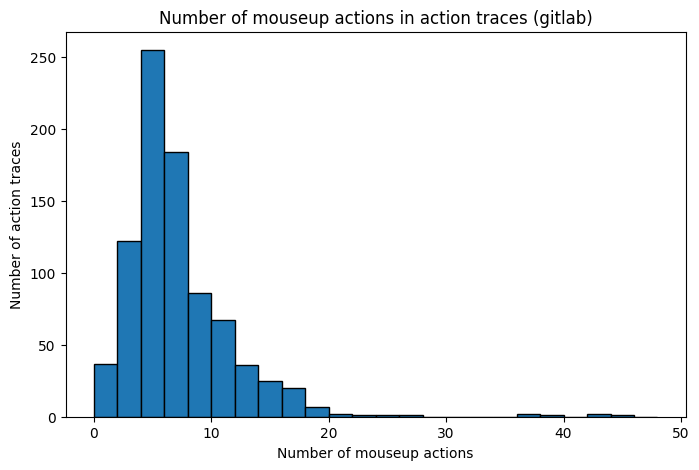

Stats for number of mouseup in gitlab SOPs:
Number of samples in gitlab: 850
Min: 0, Max: 44
Mean: 6.78, Median: 6


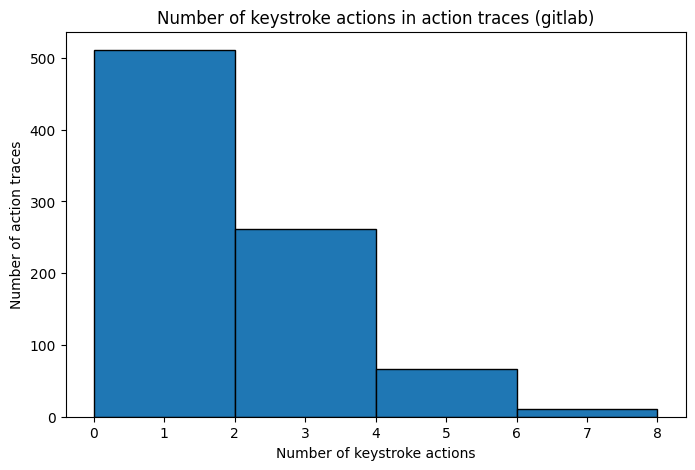

Stats for number of keystroke in gitlab SOPs:
Number of samples in gitlab: 850
Min: 0, Max: 7
Mean: 1.57, Median: 1


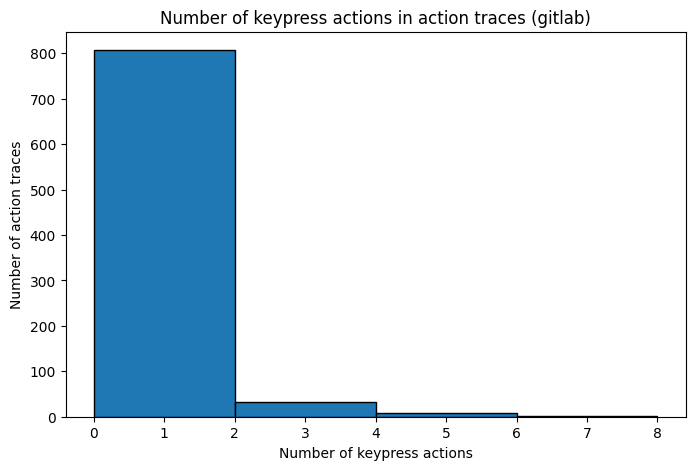

Stats for number of keypress in gitlab SOPs:
Number of samples in gitlab: 850
Min: 0, Max: 7
Mean: 0.39, Median: 0


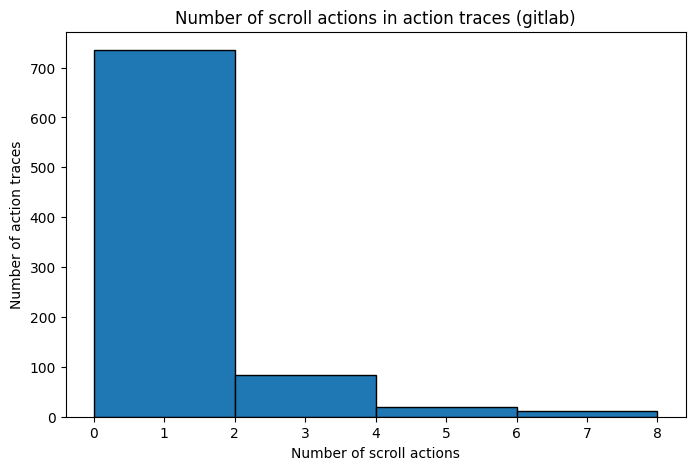

Stats for number of scroll in gitlab SOPs:
Number of samples in gitlab: 850
Min: 0, Max: 9
Mean: 0.67, Median: 0


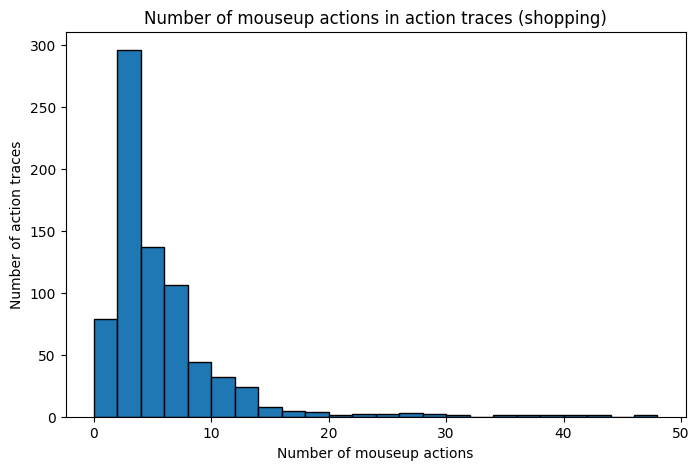

Stats for number of mouseup in shopping SOPs:
Number of samples in shopping: 752
Min: 1, Max: 47
Mean: 5.19, Median: 4


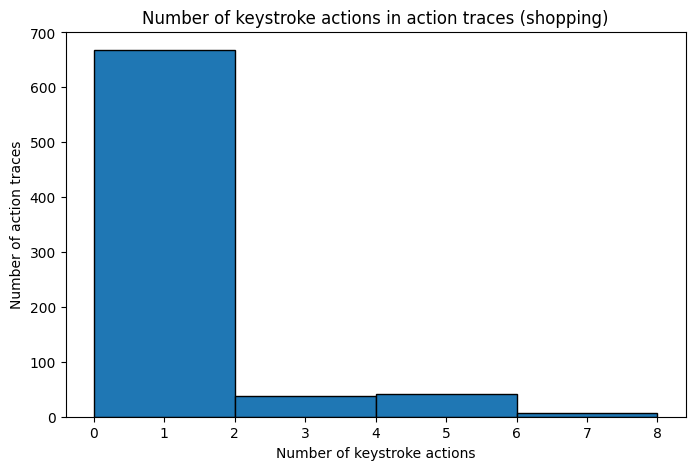

Stats for number of keystroke in shopping SOPs:
Number of samples in shopping: 752
Min: 0, Max: 7
Mean: 0.77, Median: 0


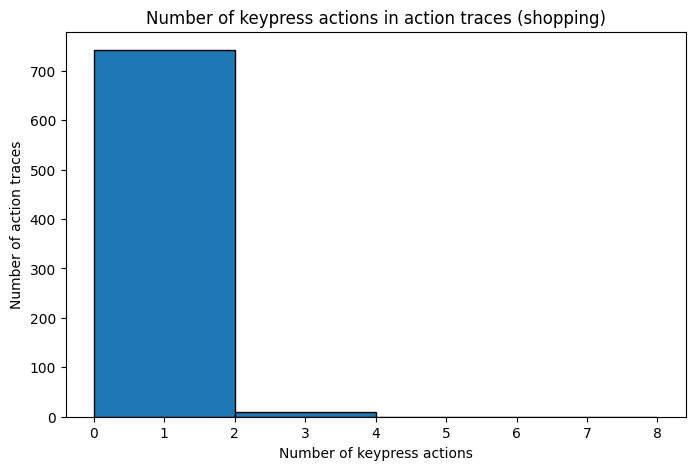

Stats for number of keypress in shopping SOPs:
Number of samples in shopping: 752
Min: 0, Max: 3
Mean: 0.30, Median: 0


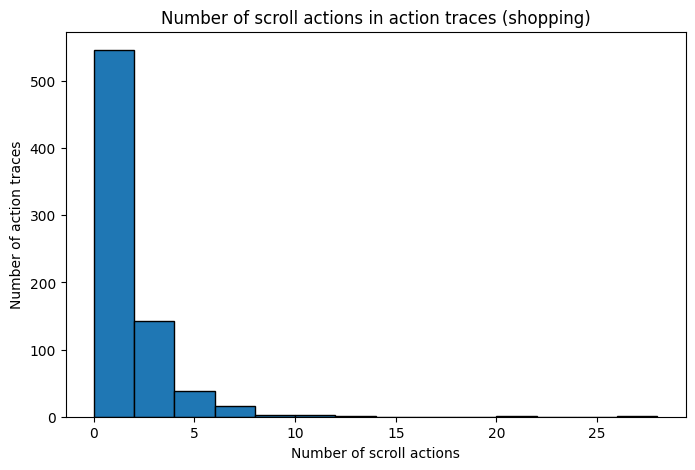

Stats for number of scroll in shopping SOPs:
Number of samples in shopping: 752
Min: 0, Max: 28
Mean: 1.28, Median: 1


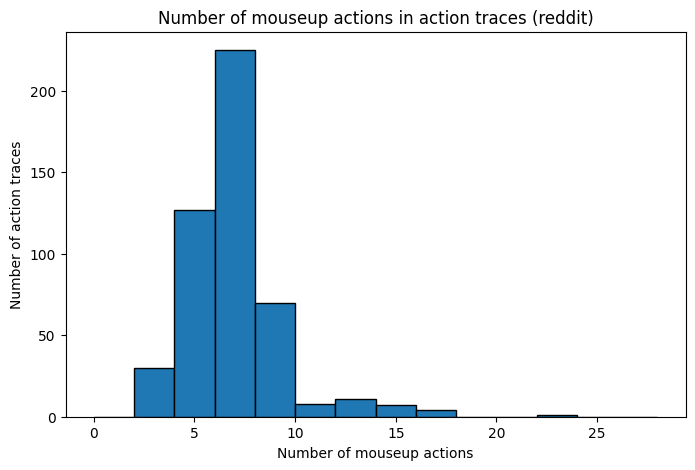

Stats for number of mouseup in reddit SOPs:
Number of samples in reddit: 483
Min: 2, Max: 23
Mean: 6.39, Median: 6


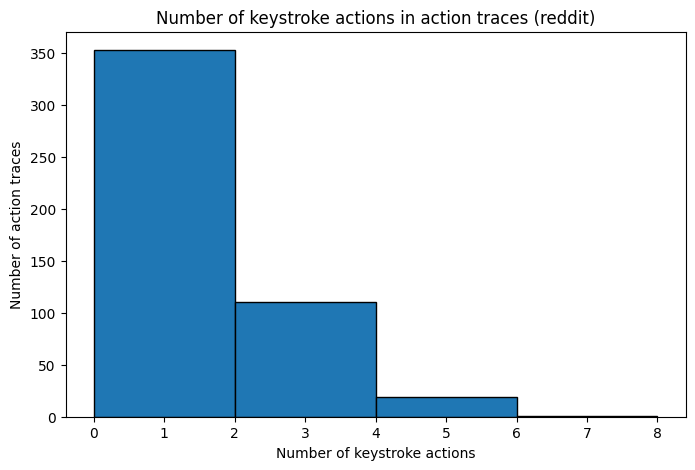

Stats for number of keystroke in reddit SOPs:
Number of samples in reddit: 483
Min: 0, Max: 8
Mean: 1.06, Median: 1


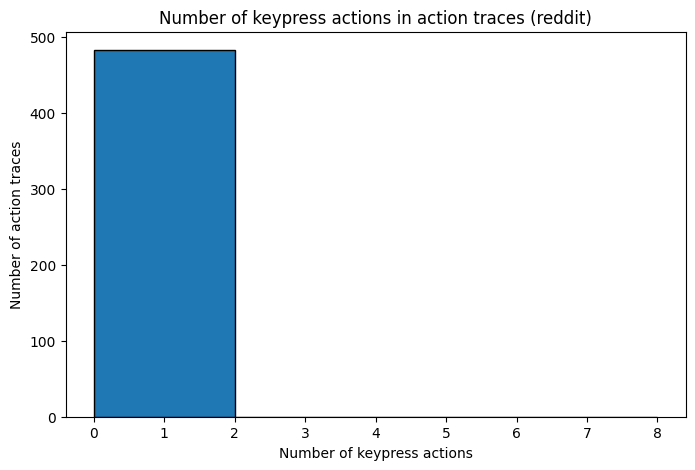

Stats for number of keypress in reddit SOPs:
Number of samples in reddit: 483
Min: 0, Max: 1
Mean: 0.06, Median: 0


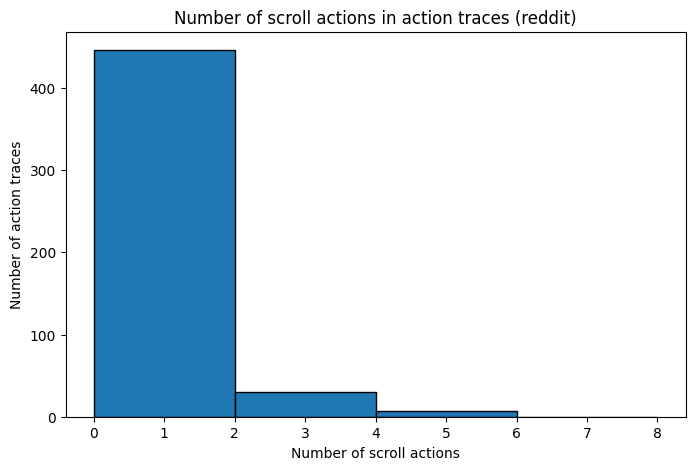

Stats for number of scroll in reddit SOPs:
Number of samples in reddit: 483
Min: 0, Max: 5
Mean: 0.47, Median: 0


In [149]:
for website, website_tasks in website_task_splits.items():
    action_counts: dict[str, list[int]] = get_action_acounts(drive, website_tasks)

    for action, counts in action_counts.items():
        plot_action_counts_hist(website, action, counts)
        print(f'Stats for number of {action} in {website} SOPs:')
        print_stats(website, counts)

### Distribution over action traces split by difficulty

#### Stats

In [150]:
for action in action_char2action.values():

    num_actions_df = get_split_stats_df(difficulty_task_splits, 'Difficulty', lambda x: get_task_action_counts(drive, x)[action])
    print(f'Stats for number of {action} actions split by difficulty:')
    print(num_actions_df.to_latex(index=False))

Stats for number of mouseup actions split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Medium & 0 & 6 & 42 \\
Hard & 2 & 9 & 47 \\
Easy & 0 & 4 & 23 \\
\bottomrule
\end{tabular}

Stats for number of keystroke actions split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Medium & 0 & 1 & 8 \\
Hard & 0 & 1 & 8 \\
Easy & 0 & 1 & 3 \\
\bottomrule
\end{tabular}

Stats for number of keypress actions split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Medium & 0 & 0 & 7 \\
Hard & 0 & 0 & 3 \\
Easy & 0 & 0 & 2 \\
\bottomrule
\end{tabular}

Stats for number of scroll actions split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Medium & 0 & 0 & 28 \\
Hard & 0 & 2 & 20 \\
Easy & 0 & 0 & 7 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

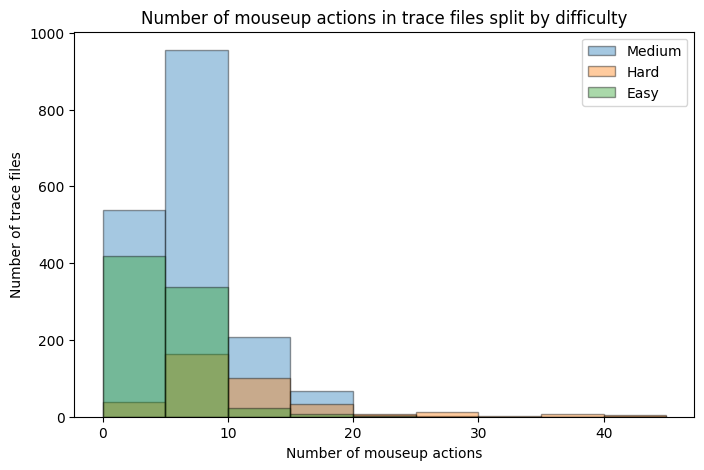

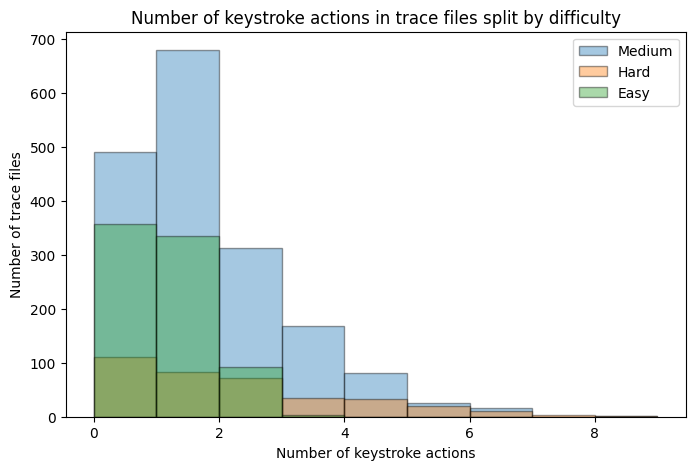

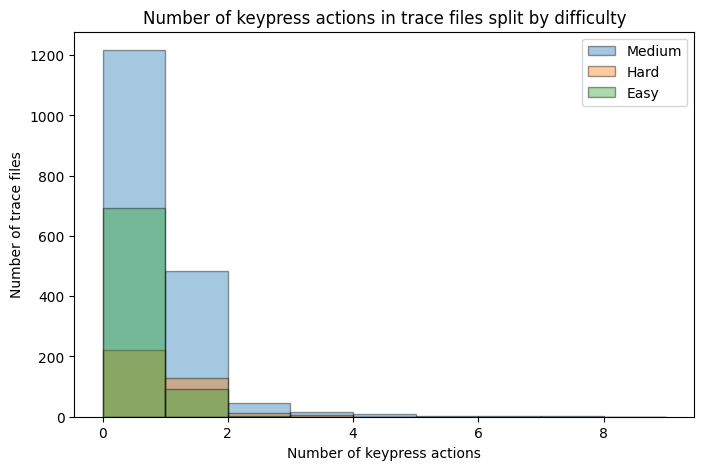

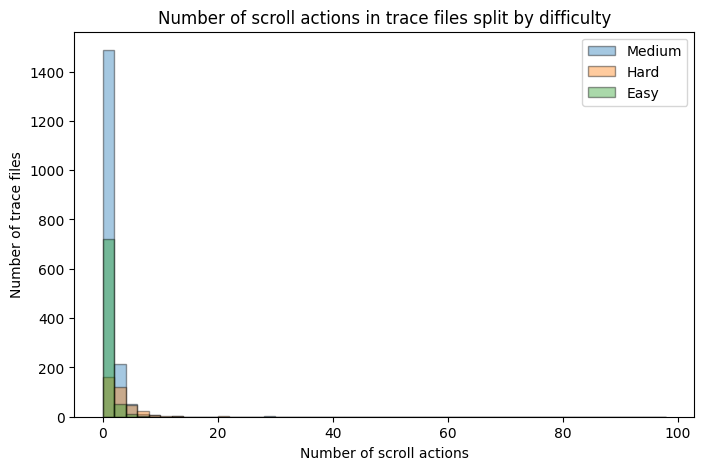

In [151]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}

for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for difficulty, difficulty_tasks in difficulty_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in difficulty_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], edgecolor='black', label=difficulty, alpha=0.4)
        
    plt.title(f'Number of {action} actions in trace files split by difficulty')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Number of trace files')
    plt.legend()
    plt.show()
    

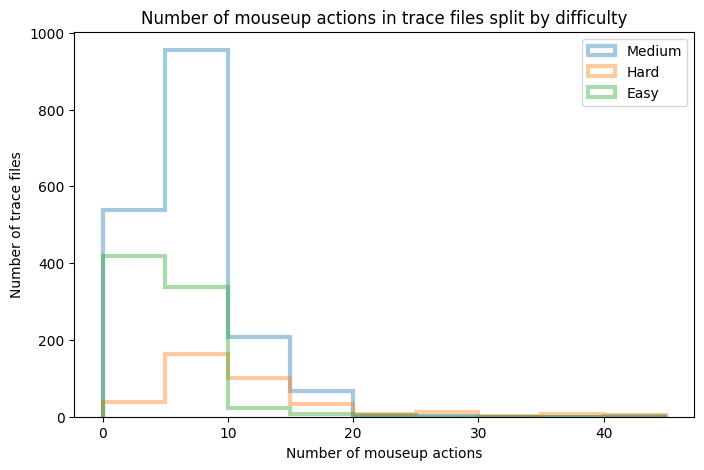

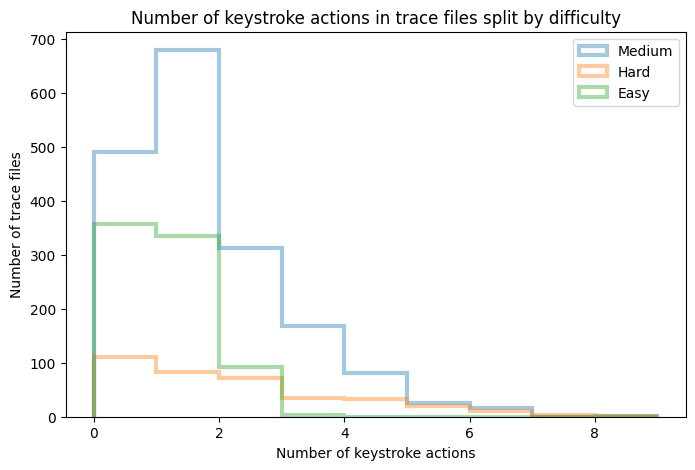

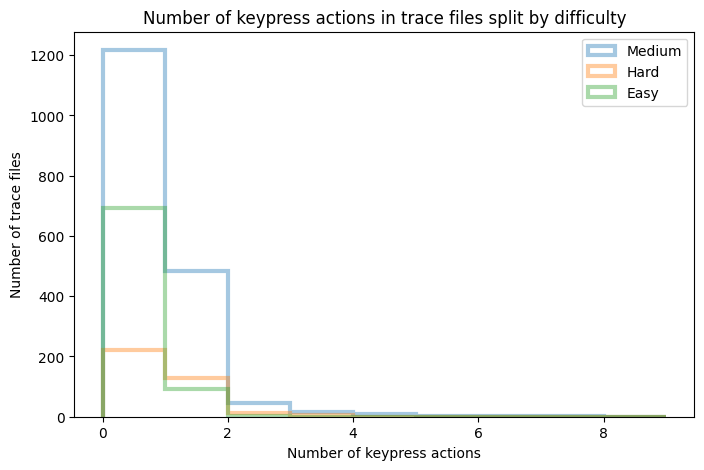

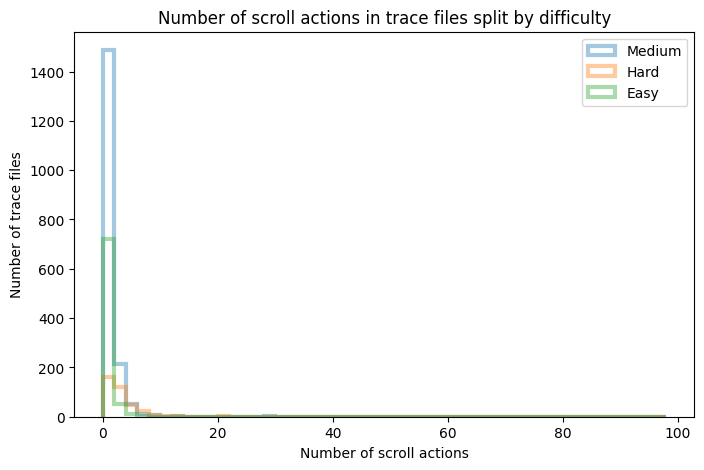

In [152]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}

for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for difficulty, difficulty_tasks in difficulty_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in difficulty_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], label=difficulty, alpha=0.4, histtype='step', linewidth=3)
        
    plt.title(f'Number of {action} actions in trace files split by difficulty')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Number of trace files')
    plt.legend()
    plt.show()
    

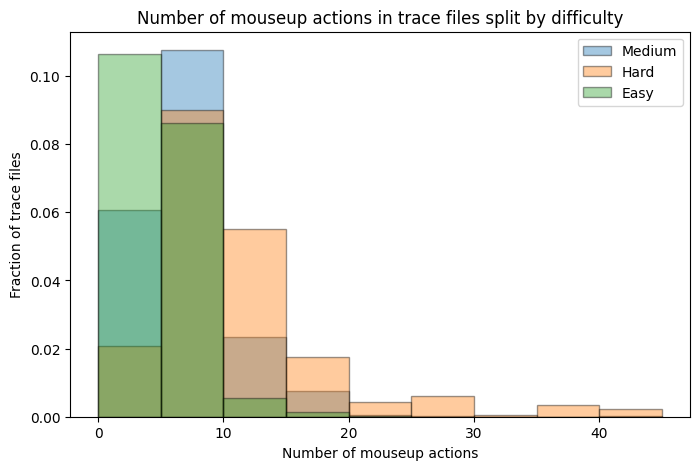

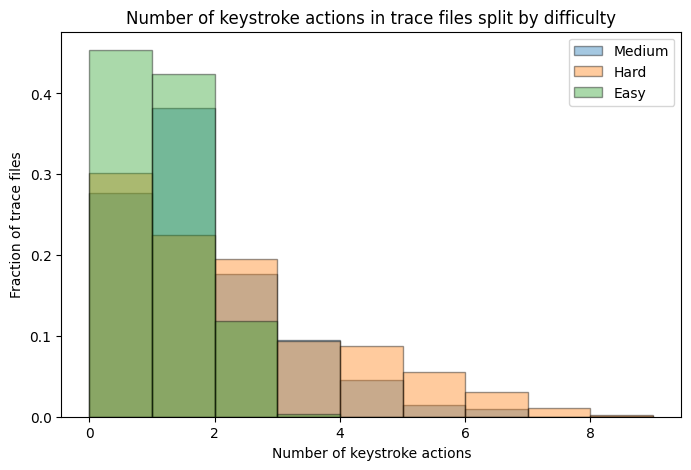

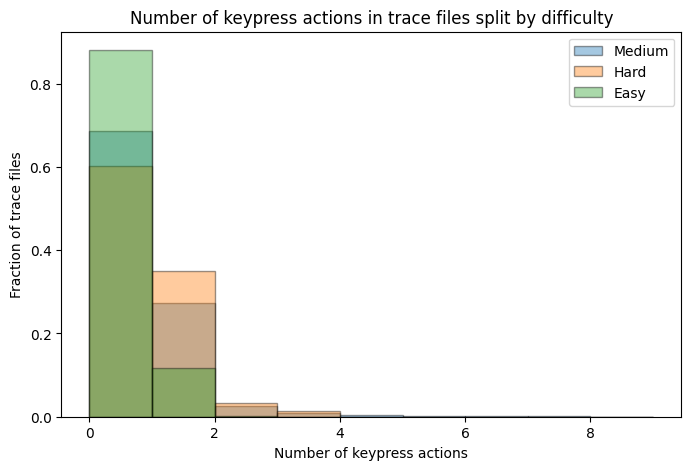

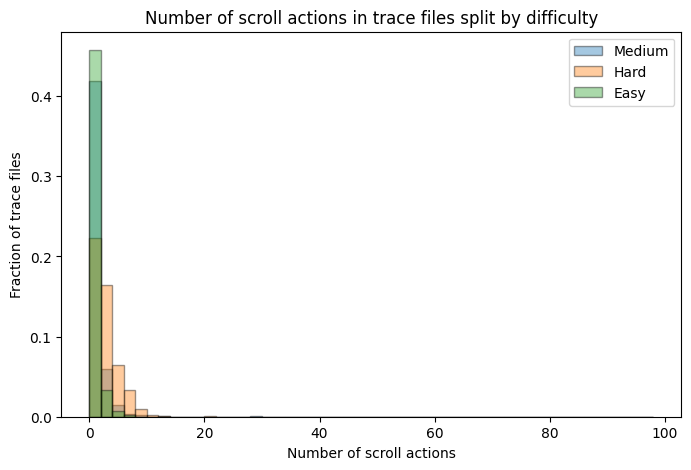

In [153]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}

for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for difficulty, difficulty_tasks in difficulty_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in difficulty_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], edgecolor='black', label=difficulty, alpha=0.4, density=True)
        
    plt.title(f'Number of {action} actions in trace files split by difficulty')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Fraction of trace files')
    plt.legend()
    plt.show()
    

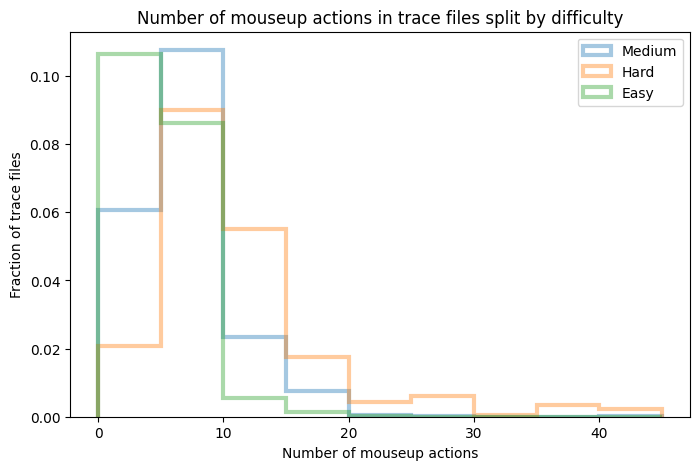

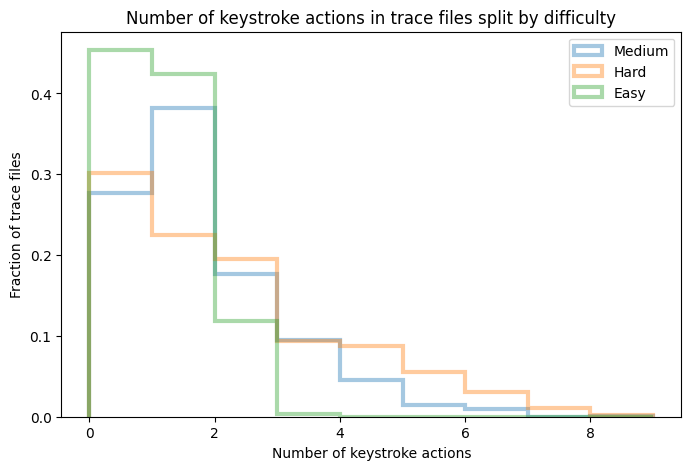

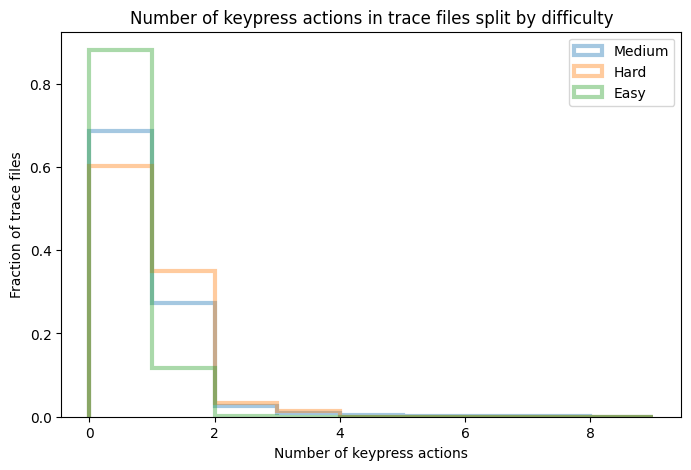

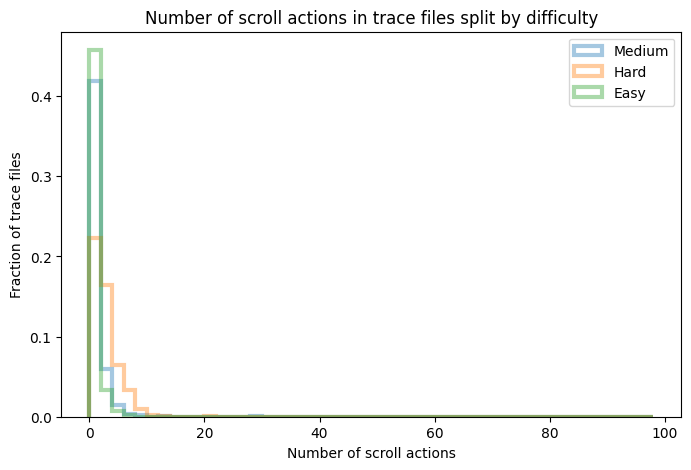

In [154]:
bin_maps = {
    'mouseup': range(0, 50, 5),
    'keystroke': range(0, 10),
    'keypress': range(0, 10),
    'scroll': range(0, 100, 2),
}

for action in action_char2action.values():

    plt.figure(figsize=(8, 5))

    for difficulty, difficulty_tasks in difficulty_task_splits.items():
        num_steps: list[int] = [get_task_action_counts(drive, task)[action] for task in difficulty_tasks]
        num_steps = [o for o in num_steps if o is not None] ## Remove None values

        plt.hist(num_steps, bins=bin_maps[action], label=difficulty, alpha=0.4, density=True, histtype='step', linewidth=3)
        
    plt.title(f'Number of {action} actions in trace files split by difficulty')
    plt.xlabel(f'Number of {action} actions')
    plt.ylabel('Fraction of trace files')
    plt.legend()
    plt.show()
    

#### Histograms by difficulty

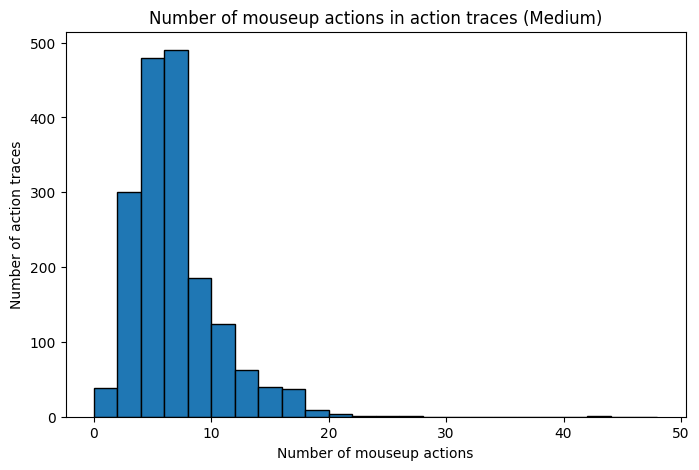

Stats for number of mouseup in Medium SOPs:
Number of samples in Medium: 1775
Min: 0, Max: 42
Mean: 6.40, Median: 6


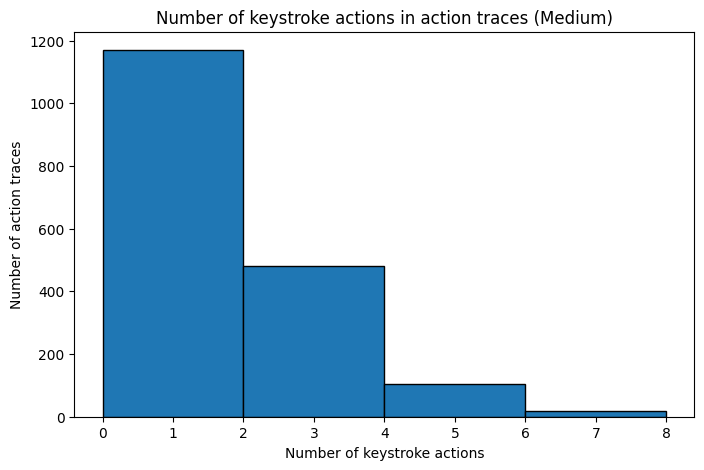

Stats for number of keystroke in Medium SOPs:
Number of samples in Medium: 1775
Min: 0, Max: 8
Mean: 1.33, Median: 1


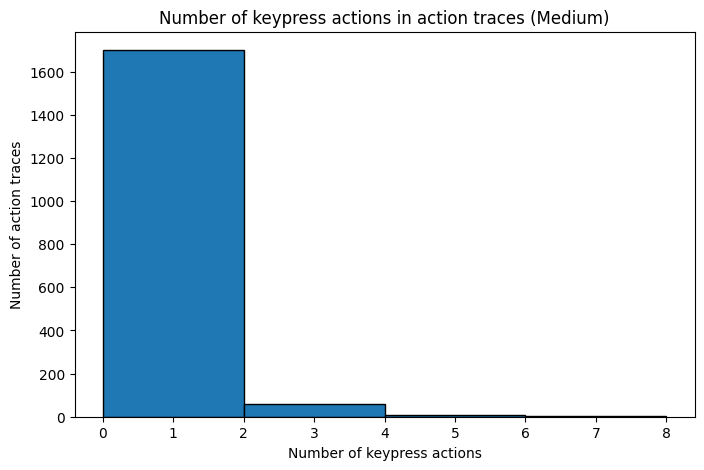

Stats for number of keypress in Medium SOPs:
Number of samples in Medium: 1775
Min: 0, Max: 7
Mean: 0.38, Median: 0


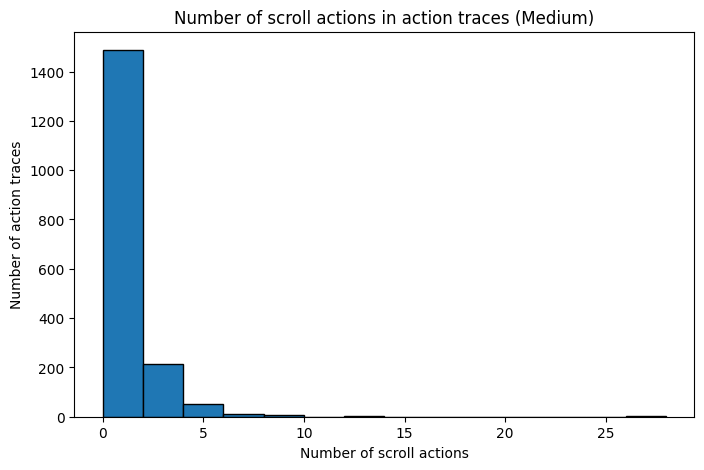

Stats for number of scroll in Medium SOPs:
Number of samples in Medium: 1775
Min: 0, Max: 28
Mean: 0.84, Median: 0


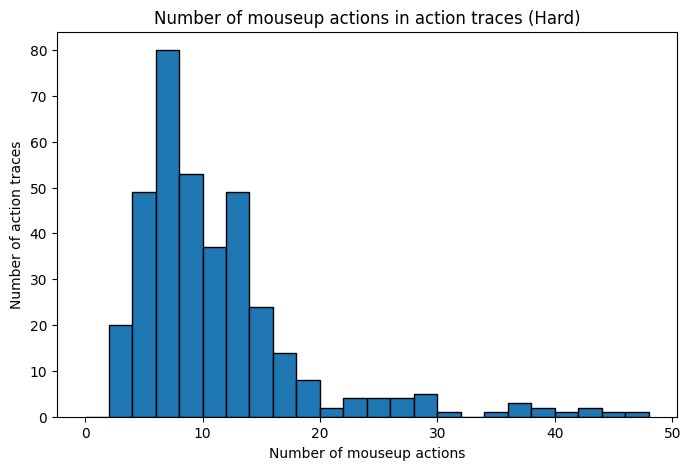

Stats for number of mouseup in Hard SOPs:
Number of samples in Hard: 365
Min: 2, Max: 47
Mean: 10.81, Median: 9


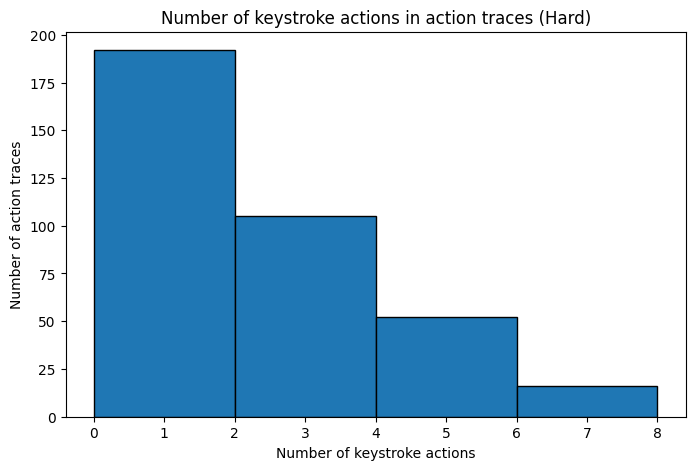

Stats for number of keystroke in Hard SOPs:
Number of samples in Hard: 365
Min: 0, Max: 8
Mean: 1.80, Median: 1


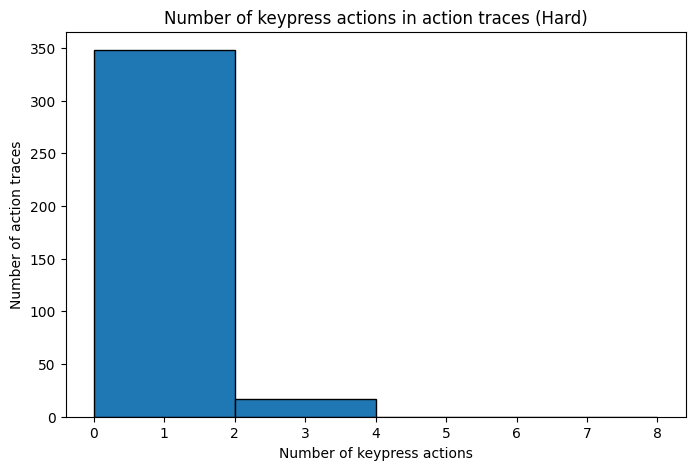

Stats for number of keypress in Hard SOPs:
Number of samples in Hard: 365
Min: 0, Max: 3
Mean: 0.46, Median: 0


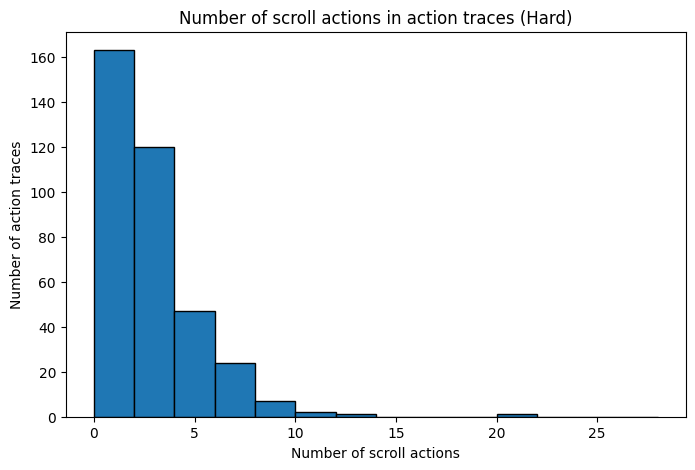

Stats for number of scroll in Hard SOPs:
Number of samples in Hard: 365
Min: 0, Max: 20
Mean: 2.39, Median: 2


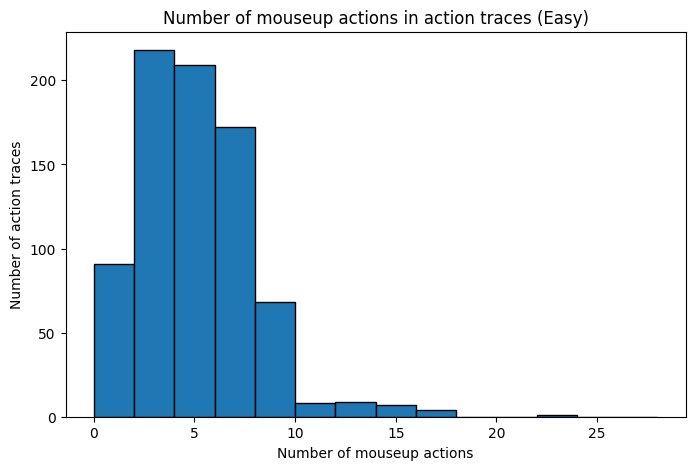

Stats for number of mouseup in Easy SOPs:
Number of samples in Easy: 787
Min: 0, Max: 23
Mean: 4.54, Median: 4


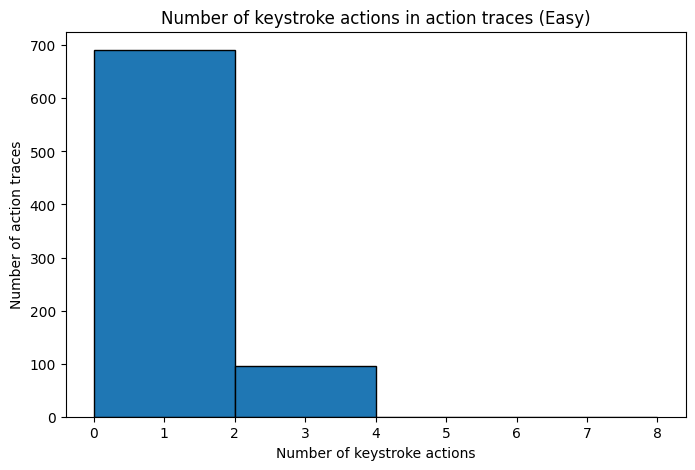

Stats for number of keystroke in Easy SOPs:
Number of samples in Easy: 787
Min: 0, Max: 3
Mean: 0.67, Median: 1


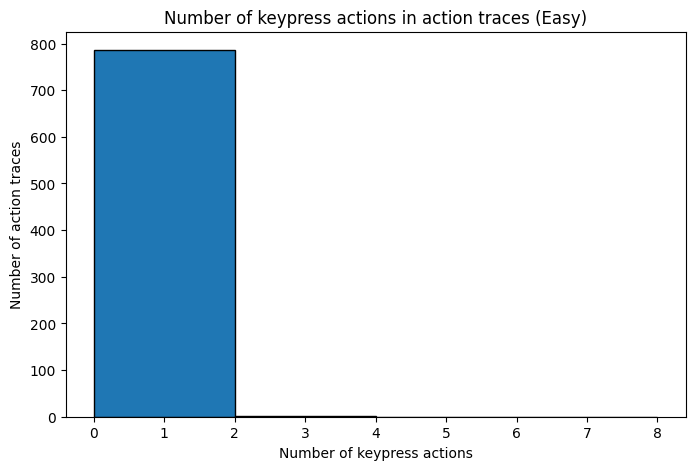

Stats for number of keypress in Easy SOPs:
Number of samples in Easy: 787
Min: 0, Max: 2
Mean: 0.12, Median: 0


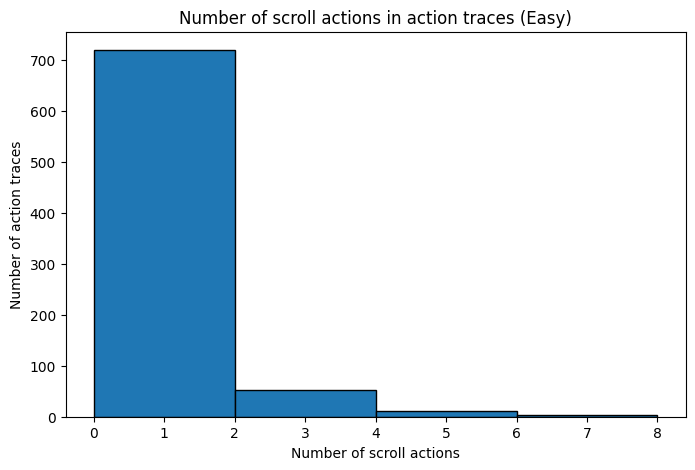

Stats for number of scroll in Easy SOPs:
Number of samples in Easy: 787
Min: 0, Max: 7
Mean: 0.43, Median: 0


In [155]:
for difficulty, difficulty_tasks in difficulty_task_splits.items():
    action_counts: dict[str, list[int]] = get_action_acounts(drive, difficulty_tasks)

    for action, counts in action_counts.items():
        plot_action_counts_hist(difficulty, action, counts)
        print(f'Stats for number of {action} in {difficulty} SOPs:')
        print_stats(difficulty, counts)

## Distribution of # demos per task

### Distribution over all demos

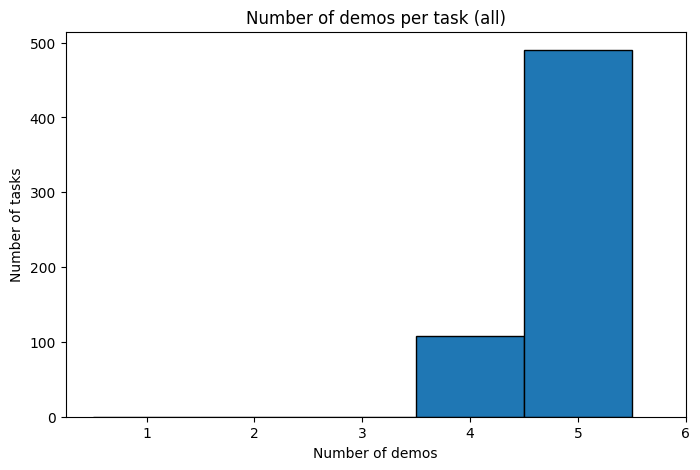

Stats for number of demos per task:
Number of samples in all: 598
Min: 4, Max: 6
Mean: 4.89, Median: 5


In [156]:
counts = get_demos_per_task_counts(drive, tasks)
plot_demos_per_task_hist('all', counts)
print('Stats for number of demos per task:')
print_stats('all', counts)

### Distribution over demos split by website

#### Stats

In [54]:
num_demos_df = get_num_demo_split_stats_df(drive, website_task_splits, 'Website')
print(f'Stats for number of demos per task split by website:')
print(num_demos_df.to_latex(index=False))

Stats for number of demos per task split by website:
\begin{tabular}{lrrr}
\toprule
Website & Min & Median & Max \\
\midrule
shopping_admin & 4 & 5 & 6 \\
gitlab & 4 & 5 & 6 \\
shopping & 4 & 5 & 6 \\
reddit & 4 & 5 & 6 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

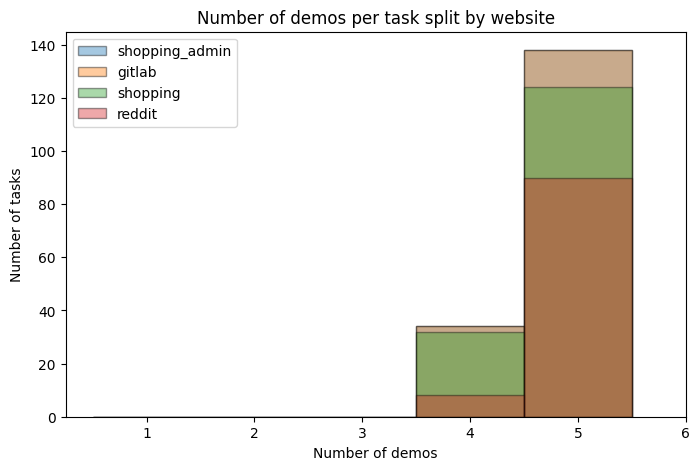

In [55]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    counts = get_demos_per_task_counts(drive, website_tasks)

    plt.hist(counts, bins=range(1, 7), edgecolor='black', label=website, alpha=0.4)
    
plt.title(f'Number of demos per task split by website')
plt.xlabel('Number of demos')
plt.ylabel('Number of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

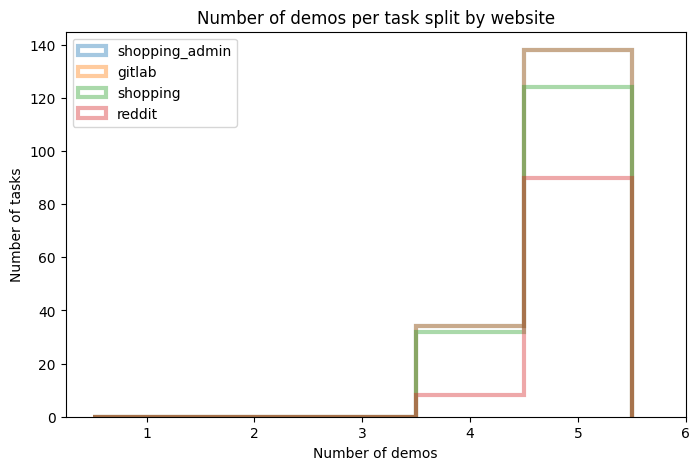

In [56]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    counts = get_demos_per_task_counts(drive, website_tasks)

    plt.hist(counts, bins=range(1, 7), label=website, alpha=0.4, histtype='step', linewidth=3)
    
plt.title(f'Number of demos per task split by website')
plt.xlabel('Number of demos')
plt.ylabel('Number of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

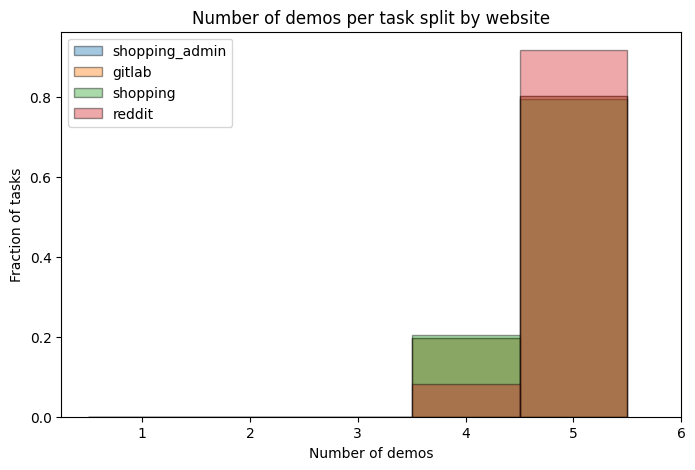

In [57]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    counts = get_demos_per_task_counts(drive, website_tasks)

    plt.hist(counts, bins=range(1, 7), edgecolor='black', label=website, alpha=0.4, density=True)
    
plt.title(f'Number of demos per task split by website')
plt.xlabel('Number of demos')
plt.ylabel('Fraction of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

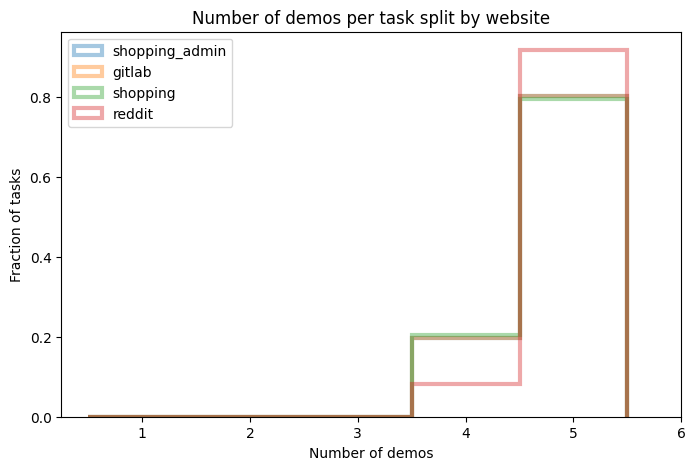

In [58]:
plt.figure(figsize=(8, 5))

for website, website_tasks in website_task_splits.items():
    counts = get_demos_per_task_counts(drive, website_tasks)

    plt.hist(counts, bins=range(1, 7), label=website, alpha=0.4, histtype='step', linewidth=3, density=True)
    
plt.title(f'Number of demos per task split by website')
plt.xlabel('Number of demos')
plt.ylabel('Fraction of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

#### Histogram per website

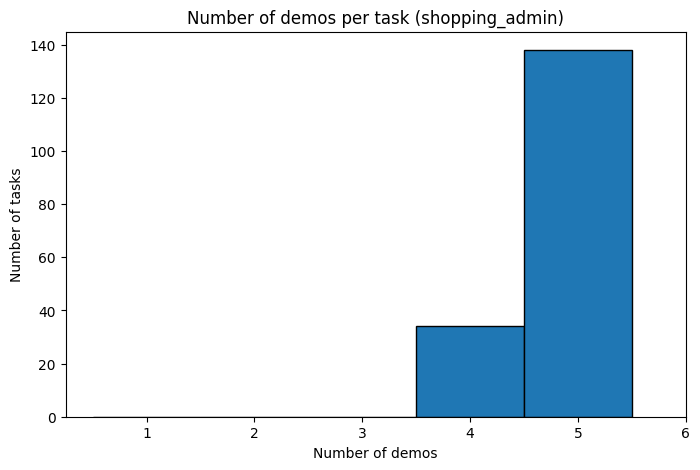

Stats for number of demos per task:
Number of samples in shopping_admin: 172
Min: 4, Max: 6
Mean: 4.90, Median: 5


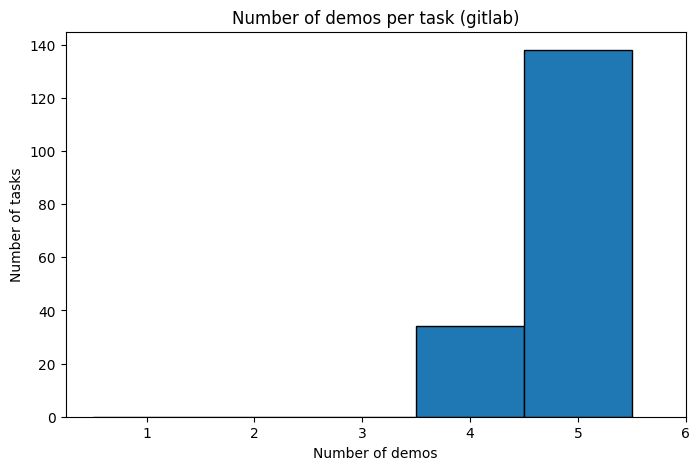

Stats for number of demos per task:
Number of samples in gitlab: 172
Min: 4, Max: 6
Mean: 4.94, Median: 5


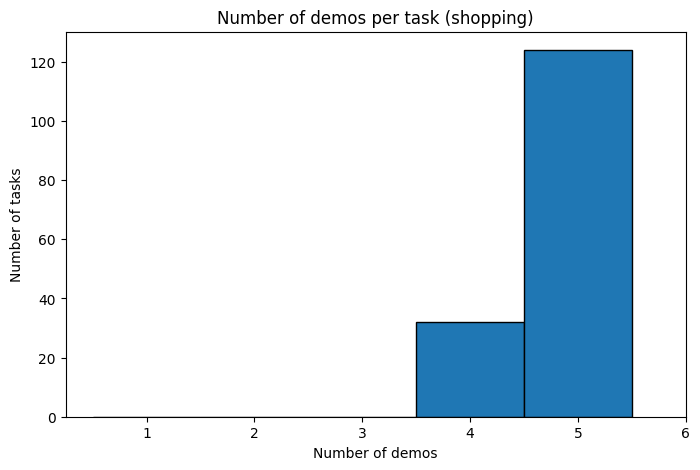

Stats for number of demos per task:
Number of samples in shopping: 156
Min: 4, Max: 6
Mean: 4.82, Median: 5


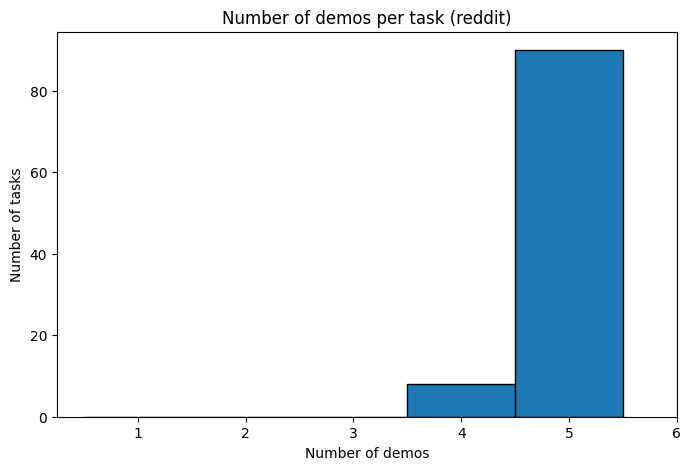

Stats for number of demos per task:
Number of samples in reddit: 98
Min: 4, Max: 6
Mean: 4.93, Median: 5


In [59]:
for website, website_tasks in website_task_splits.items():
    counts = get_demos_per_task_counts(drive, website_tasks)
    plot_demos_per_task_hist(website, counts)
    print('Stats for number of demos per task:')
    print_stats(website, counts)

### Distribution over demos split by difficulty

#### Stats

In [60]:
num_demos_df = get_num_demo_split_stats_df(drive, difficulty_task_splits, 'Difficulty')
print(f'Stats for number of demos per task split by difficulty:')
print(num_demos_df.to_latex(index=False))

Stats for number of demos per task split by difficulty:
\begin{tabular}{lrrr}
\toprule
Difficulty & Min & Median & Max \\
\midrule
Easy & 1 & 3 & 6 \\
Medium & 1 & 2 & 5 \\
Hard & 1 & 1 & 5 \\
\bottomrule
\end{tabular}



#### Overlaid histogram

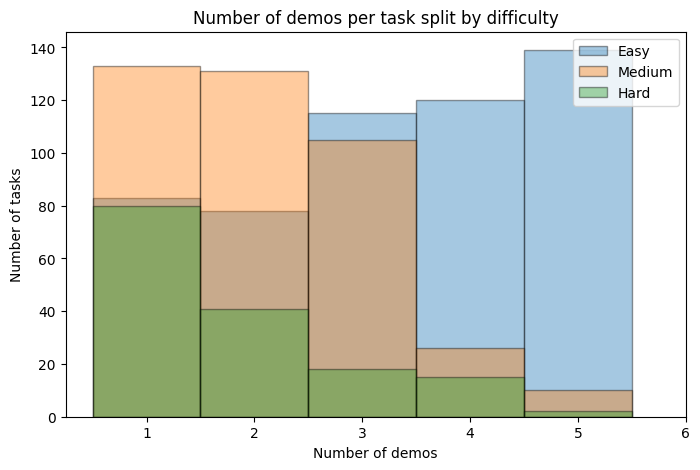

In [61]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    counts = get_demos_per_task_counts(drive, difficulty_tasks)

    plt.hist(counts, bins=range(1, 7), edgecolor='black', label=difficulty, alpha=0.4)
    
plt.title(f'Number of demos per task split by difficulty')
plt.xlabel('Number of demos')
plt.ylabel('Number of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

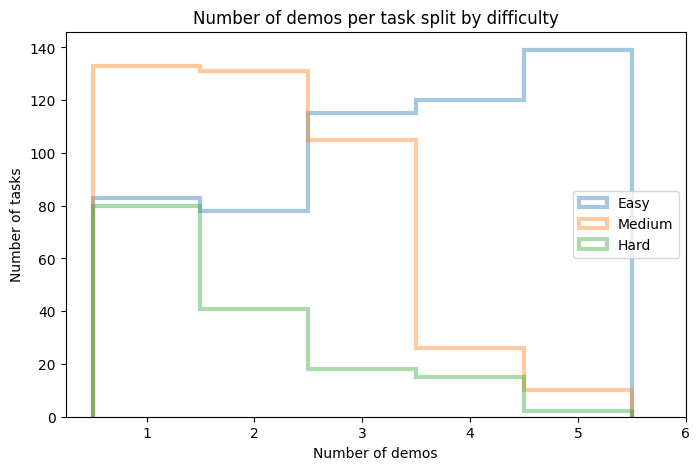

In [62]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    counts = get_demos_per_task_counts(drive, difficulty_tasks)

    plt.hist(counts, bins=range(1, 7), label=difficulty, alpha=0.4, histtype='step', linewidth=3)
    
plt.title(f'Number of demos per task split by difficulty')
plt.xlabel('Number of demos')
plt.ylabel('Number of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

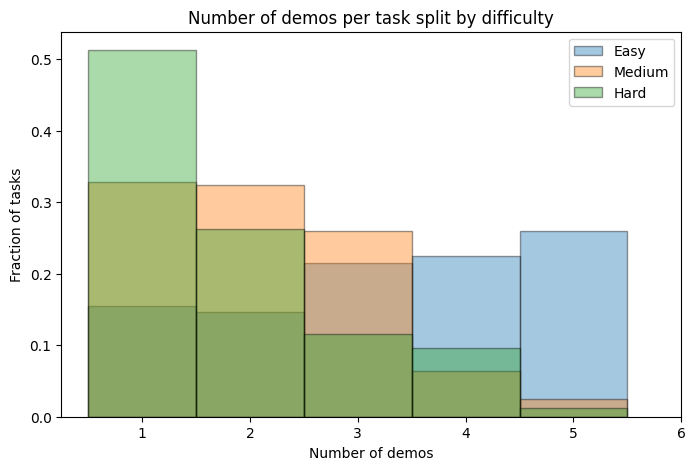

In [63]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    counts = get_demos_per_task_counts(drive, difficulty_tasks)

    plt.hist(counts, bins=range(1, 7), edgecolor='black', label=difficulty, alpha=0.4, density=True)
    
plt.title(f'Number of demos per task split by difficulty')
plt.xlabel('Number of demos')
plt.ylabel('Fraction of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

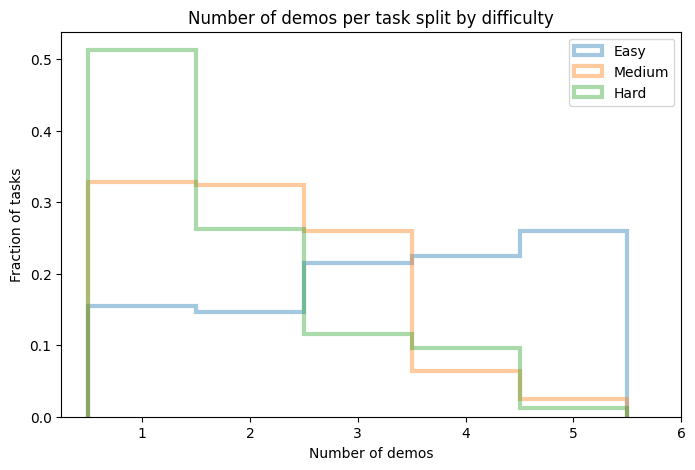

In [64]:
plt.figure(figsize=(8, 5))

for difficulty, difficulty_tasks in difficulty_task_splits.items():
    counts = get_demos_per_task_counts(drive, difficulty_tasks)

    plt.hist(counts, bins=range(1, 7), label=difficulty, alpha=0.4, histtype='step', linewidth=3, density=True)
    
plt.title(f'Number of demos per task split by difficulty')
plt.xlabel('Number of demos')
plt.ylabel('Fraction of tasks')
plt.xticks(np.arange(1, 7)+0.5, np.arange(1, 7))
plt.legend()
plt.show()

#### Histogram per difficulty

In [91]:
tasks_ids = pd.DataFrame([ x.task_id for x in difficulty_tasks ])
tasks_ids

0
0    440
1     23
2    437
3    436
4    523
..   ...
281  290
282  442
283  508
284  778
285  282

[286 rows x 1 columns]

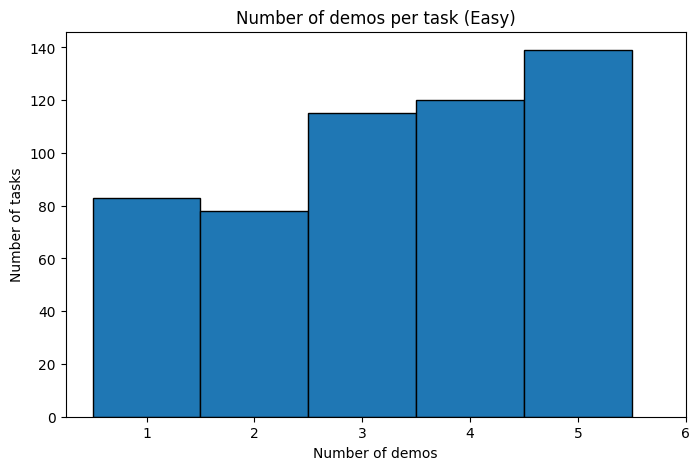

Stats for number of demos per task:
Number of samples in Easy: 535
Min: 1, Max: 6
Mean: 3.30, Median: 3


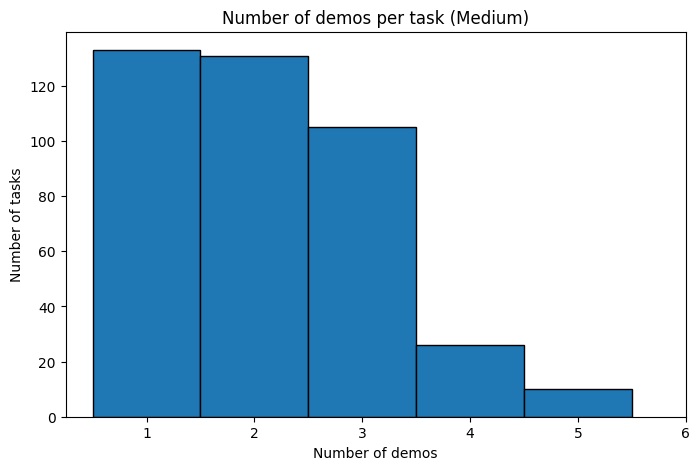

Stats for number of demos per task:
Number of samples in Medium: 405
Min: 1, Max: 5
Mean: 2.13, Median: 2


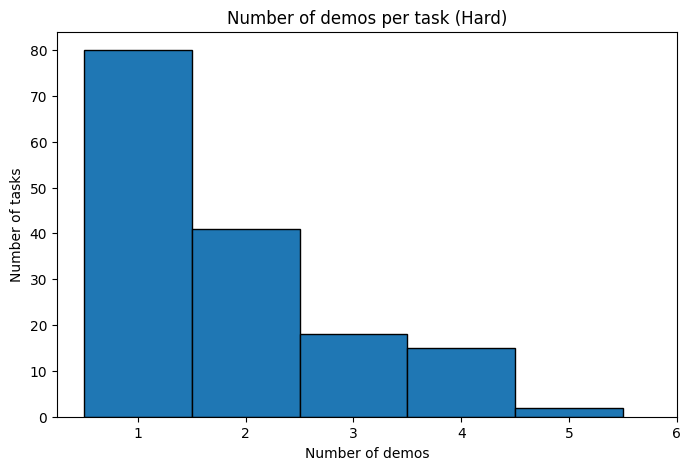

Stats for number of demos per task:
Number of samples in Hard: 156
Min: 1, Max: 5
Mean: 1.83, Median: 1


In [78]:
for difficulty, difficulty_tasks in difficulty_task_splits.items():
    counts = get_demos_per_task_counts(drive, difficulty_tasks)
    plot_demos_per_task_hist(difficulty, counts)
    print('Stats for number of demos per task:')
    print_stats(difficulty, counts)

In [77]:
counts

[3,
 1,
 3,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 1,
 1,
 2,
 4,
 2,
 2,
 5,
 4,
 1,
 1,
 3,
 3,
 1,
 2,
 4,
 3,
 4,
 2,
 2,
 1,
 4,
 3,
 2,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 2,
 4,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 4,
 4,
 3,
 1,
 1,
 4,
 2,
 2,
 1,
 2,
 1,
 4,
 1,
 2,
 3,
 2,
 4,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

## t-SNE plot of BERT embeddings of SOPs

In [66]:
embeddings, difficulty, website = get_bert_sop_embedding_data(drive, tasks, path_to_cache_dir)
plot_tsne(embeddings, difficulty, website, 'SOP BERT Embeddings')
print('Number of SOPs considered:', len(embeddings))

NameError: name 'BertTokenizer' is not defined

## t-SNE plot of M2-BERT embeddings of trace.json (w/o `json_state` and `html`)

In [303]:
os.environ['TOGETHER_API_KEY'] = '' # set your together api key here

embeddings, difficulty, website = get_m2_bert_trace_embedding_data(drive, tasks, False, path_to_cache_dir)

0it [00:00, ?it/s]


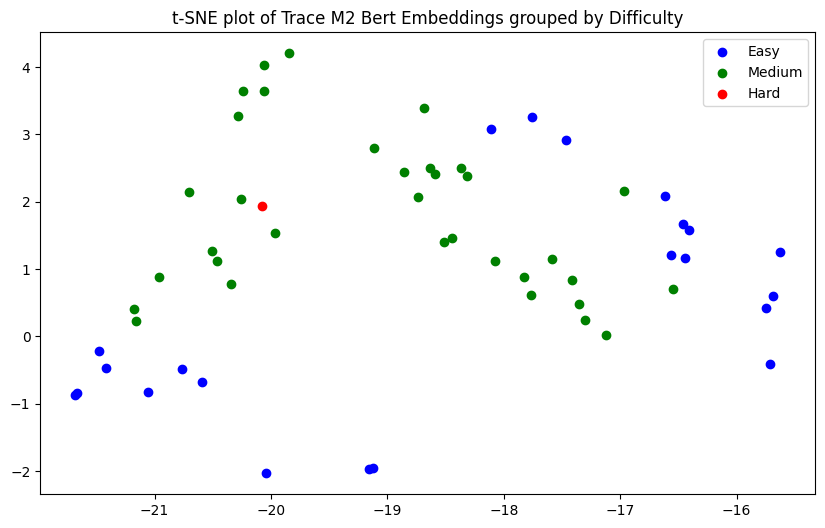

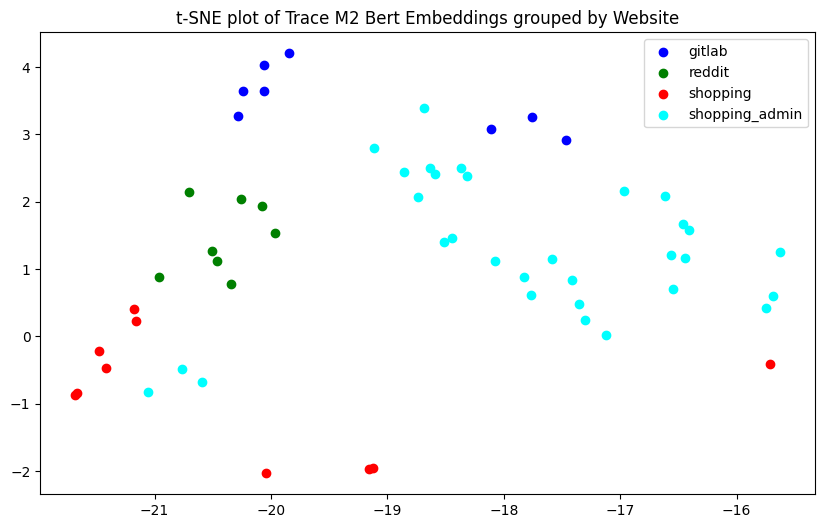

In [304]:
plot_tsne(embeddings, difficulty, website, 'Trace M2 Bert Embeddings')

## t-SNE plot of M2-BERT embeddings of trace.json (w/o `html`)

In [27]:
os.environ['TOGETHER_API_KEY'] = '' # set your together api key here

embeddings, difficulty, website = get_m2_bert_trace_embedding_data(drive, tasks, True, path_to_cache_dir)

0it [00:00, ?it/s]


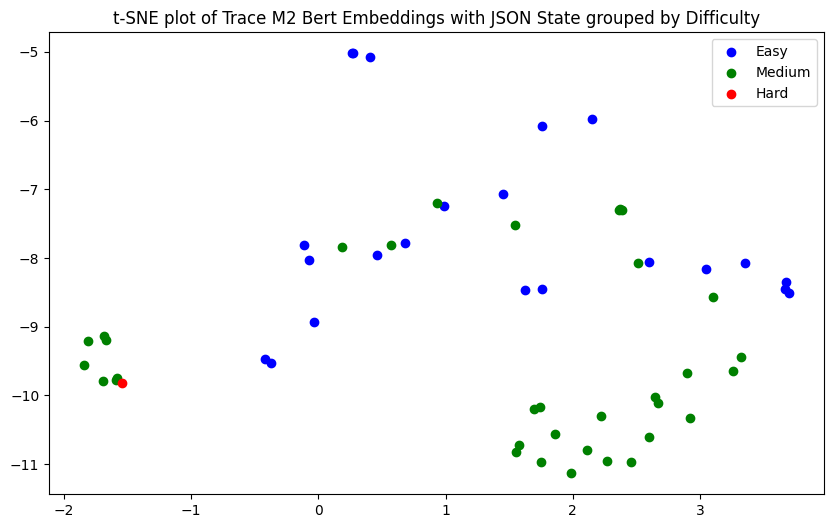

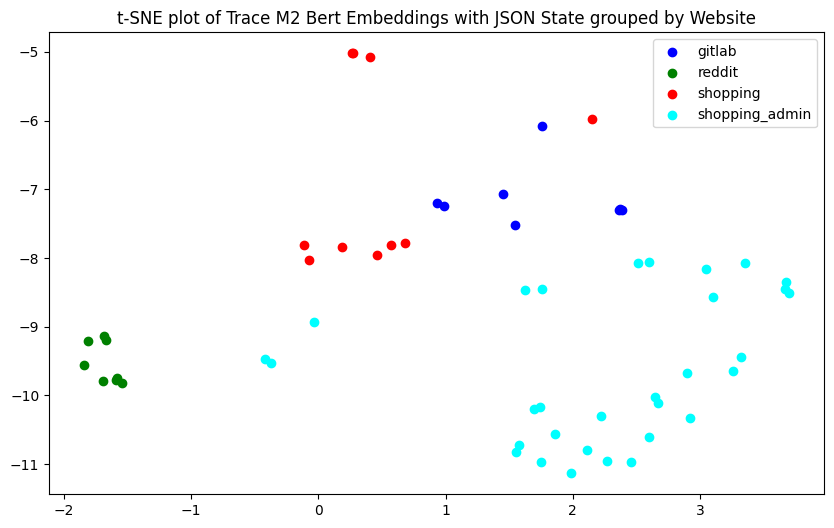

In [28]:
plot_tsne(embeddings, difficulty, website, 'Trace M2 Bert Embeddings with JSON State')

## Sankey plot of action sequences

In [67]:
sankey_plot_action_sequences(drive, tasks)

Number of action sequences: 2927


## Split of task difficulty by website

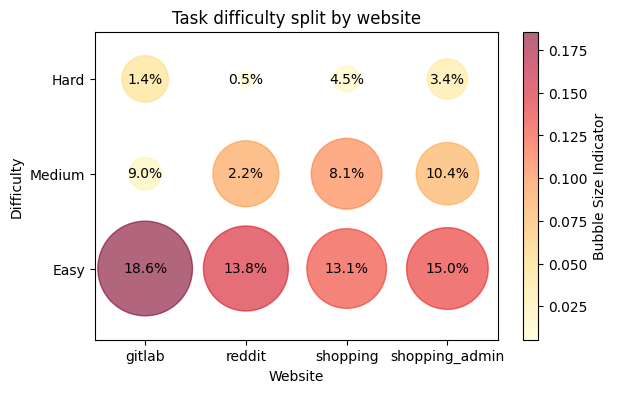

In [157]:
plot_difficulty_by_website(tasks)

## Correlation between difficulty and # of steps

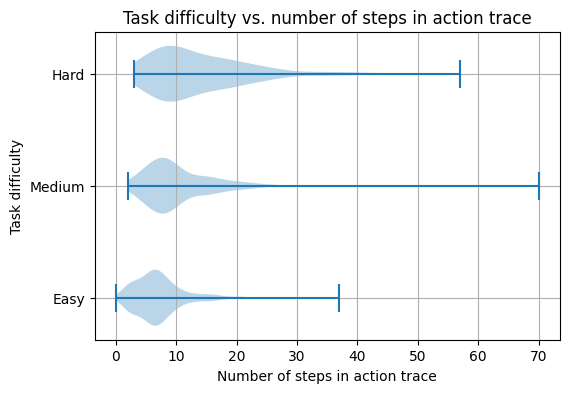

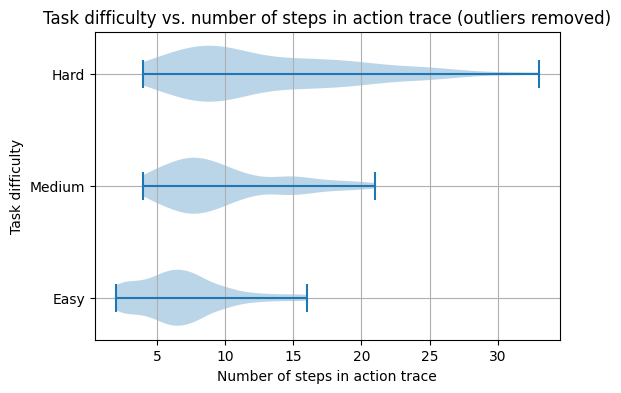

In [69]:
plot_difficulty_num_steps_corr(drive, tasks, False)
plot_difficulty_num_steps_corr(drive, tasks, True)

## Correlation between difficulty and recording length

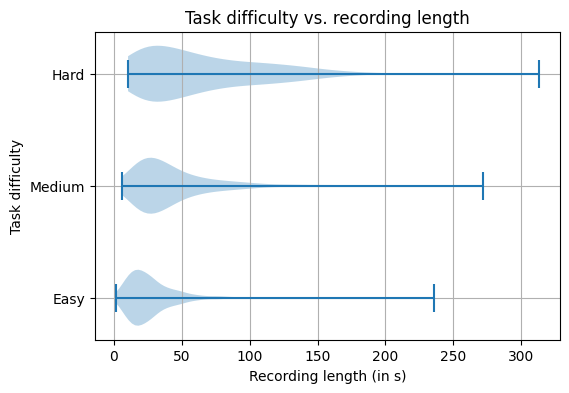

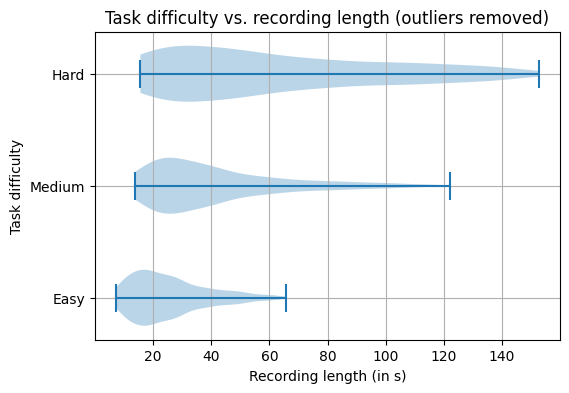

In [74]:
plot_difficulty_recording_len_corr(drive, tasks, path_to_cache_dir, False)
plot_difficulty_recording_len_corr(drive, tasks, path_to_cache_dir, True)